In [1]:
import datetime

import gym
import matplotlib
import numpy as np
import pandas as pd
from gym import spaces
from gym.utils import seeding

matplotlib.use("Agg")
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from IPython.display import clear_output
from datetime import timedelta
from collections import deque
import math

%matplotlib inline

In [120]:
swaps = pd.read_csv('../Downloads/updSwapsWethUsdc.csv', nrows=100, delimiter=';')
'''trades["timestamp"] = pd.to_datetime(trades["timestamp"])
data = data[data["timestamp"].dt.date == pd.to_datetime("2024-11-20").date()]'''
swaps

,blockNumber,blockTimestamp,id,sqrtPriceX96,tick,transactionHash,datetime
0,22657190,1732103727,0x115c195205262df99cc4df0b6e5ea8950b206f6f501c...,4415530302610981196154583,-195909,0x115c195205262df99cc4df0b6e5ea8950b206f6f501c...,2024-11-20 11:55:27
1,22657190,1732103727,0x74f0356e2c215f787836da25d7dd152ec2178633a665...,4415540999350338439900045,-195909,0x74f0356e2c215f787836da25d7dd152ec2178633a665...,2024-11-20 11:55:27
2,22657191,1732103729,0xbd67283123b083b96913a18988bbf6600e38350f4453...,4415529687430254343749542,-195909,0xbd67283123b083b96913a18988bbf6600e38350f4453...,2024-11-20 11:55:29
3,22657192,1732103731,0x1c199d1f5db27fa2121db02150a4f9994b9699535b00...,4415392439899942140668747,-195910,0x1c199d1f5db27fa2121db02150a4f9994b9699535b00...,2024-11-20 11:55:31
4,22657192,1732103731,0x2d040753e4557524834dea6c1be87c950b7d1b9cfb3a...,4415378553972417120956397,-195910,0x2d040753e4557524834dea6c1be87c950b7d1b9cfb3a...,2024-11-20 11:55:31
...,...,...,...,...,...,...,...
95,22657422,1732104191,0x4ba9b50fd7d0394e87fecf632e159b790bb350e36e95...,4412646871008642900992987,-195923,0x4ba9b50fd7d0394e87fecf632e159b790bb350e36e95...,2024-11-20 12:03:11
96,22657422,1732104191,0x9caa1561fe0508df85827ed111287ded204353ac74cd...,4412646916349076822040162,-195923,0x9caa1561fe0508df85827ed111287ded204353ac74cd...,2024-11-20 12:03:11
97,22657424,1732104195,0x83c21c9d0bdde62cd3118359043ac632687b8bed5881...,4412647639484127841591439,-195923,0x83c21c9d0bdde62cd3118359043ac632687b8bed5881...,2024-11-20 12:03:15
98,22657429,1732104205,0x705ab5337aabe3ad790532c69ad13cfc9a528de47c29...,4412647777447727713964361,-195923,0x705ab5337aabe3ad790532c69ad13cfc9a528de47c29...,2024-11-20 12:03:25


In [3]:
st = pd.to_datetime('2023-06-23 14:52:32')
st1 = pd.to_datetime('2023-06-23 14:54:18')
(st1 - st).seconds, st1 - st

(106, Timedelta('0 days 00:01:46'))

In [4]:
snaps = pd.read_csv('../Downloads/updLiquiditySnapshots.csv', nrows=100)
'''trades["timestamp"] = pd.to_datetime(trades["timestamp"])
data = data[data["timestamp"].dt.date == pd.to_datetime("2024-11-20").date()]'''
snaps

,block,-210000,-209900,-209800,-209700,-209600,-209500,-209400,-209300,-209200,...,-180900,-180800,-180700,-180600,-180500,-180400,-180300,-180200,-180100,-180000
0,22629197,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
1,22629198,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
2,22629200,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
3,22629202,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
4,22629206,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22629421,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
96,22629422,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
97,22629426,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
98,22629428,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,3330311954049,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140


In [161]:
trades = pd.read_csv('../Downloads/vertex_eth_usdc_last_700_days (1).csv')
trades["timestamp"] = pd.to_datetime(trades["timestamp"])
trades = trades[(trades["timestamp"].dt.date == pd.to_datetime("2024-11-20").date()) & (trades["timestamp"].dt.hour == 11) & (trades["timestamp"].dt.minute == 55 or trades["timestamp"].dt.minute == 56)]
trades

,trade_id,timestamp,price,base_filled,quote_filled,trade_type
9084666,49402911,2024-11-20 11:55:04,3108.3,-0.30,932.490,sell
9084667,49402916,2024-11-20 11:55:19,3107.3,0.15,-466.095,buy
9084668,49402940,2024-11-20 11:55:40,3105.5,0.10,-310.550,buy


In [6]:
order_book = pd.read_csv('../Downloads/2024-11-20.csv')
'''data["timestamp"] = pd.to_datetime(data["timestamp"])
data = data[(data["timestamp"].dt.date == pd.to_datetime("2024-11-20").date()) & (data["timestamp"].dt.hour == 15) & (data["timestamp"].dt.minute == 5) & (data["timestamp"].dt.second == 30)]'''
order_book

,timestamp,bid_price_1,bid_price_2,bid_price_3,bid_price_4,bid_price_5,bid_price_6,bid_price_7,bid_price_8,bid_price_9,...,ask_qty_13,ask_qty_14,ask_qty_15,ask_qty_16,ask_qty_17,ask_qty_18,ask_qty_19,ask_qty_20,binance_price,funding_rate
0,2024-11-20 11:55:05.636,3108.0,3107.8,3107.7,3107.6,3107.5,3107.4,3107.3,3107.2,3106.8,...,12.86,12.24,10.10,9.15,32.14,32.14,64.27,1.32,3105.47,0.000029
1,2024-11-20 11:55:05.713,3108.0,3107.8,3107.7,3107.6,3107.5,3107.4,3107.3,3107.2,3106.8,...,12.86,12.24,10.10,9.15,32.14,32.14,64.27,1.32,3105.47,0.000029
2,2024-11-20 11:55:05.763,3108.0,3107.8,3107.7,3107.6,3107.5,3107.4,3107.3,3107.2,3106.8,...,12.86,12.24,10.10,9.15,32.14,32.14,64.27,1.32,3105.47,0.000029
3,2024-11-20 11:55:05.811,3108.0,3107.8,3107.7,3107.6,3107.5,3107.4,3107.3,3107.2,3106.8,...,12.86,12.24,10.10,9.15,32.14,32.14,64.27,1.32,3105.47,0.000029
4,2024-11-20 11:55:05.863,3108.0,3107.8,3107.7,3107.6,3107.5,3107.4,3107.3,3107.2,3106.8,...,12.86,12.24,10.10,9.15,32.14,32.14,64.27,1.32,3105.47,0.000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587327,2024-11-20 23:59:59.392,3074.6,3074.5,3074.4,3074.2,3074.1,3074.0,3073.8,3073.6,3073.4,...,33.00,1.69,64.98,113.70,64.97,115.01,1.69,1.65,3072.17,0.000032
587328,2024-11-20 23:59:59.597,3074.6,3074.5,3074.4,3074.2,3074.1,3074.0,3073.8,3073.6,3073.4,...,33.00,1.69,64.98,113.70,64.97,115.01,1.69,1.65,3072.17,0.000032
587329,2024-11-20 23:59:59.648,3074.6,3074.5,3074.4,3074.2,3074.1,3074.0,3073.8,3073.6,3073.4,...,33.00,1.69,64.98,113.70,64.97,115.01,1.69,1.65,3072.17,0.000032
587330,2024-11-20 23:59:59.751,3074.6,3074.5,3074.4,3074.2,3074.1,3074.0,3073.8,3073.6,3073.4,...,33.00,1.69,64.98,113.70,64.97,115.01,1.69,1.65,3072.17,0.000032


In [9]:
moons = pd.read_csv('../Downloads/updMoonRates (1).csv')
'''data["timestamp"] = pd.to_datetime(data["timestamp"])
data = data[(data["timestamp"].dt.date == pd.to_datetime("2024-11-20").date()) & (data["timestamp"].dt.hour == 15) & (data["timestamp"].dt.minute == 5) & (data["timestamp"].dt.second == 30)]'''
moons

,blockNumber,blockTimestamp,stable_borrow_rate,stable_supply_rate,risky_borrow_rate,risky_supply_rate,stable_liq,risky_liq
0,22657179,2024-11-20T11:55:05,0.054621,0.044017,NaN,NaN,6.767126e+06,NaN
1,22657191,2024-11-20T11:55:29,0.054629,0.044031,NaN,NaN,6.757120e+06,NaN
2,22657203,2024-11-20T11:55:53,NaN,NaN,0.007493,0.005334,NaN,12217.647011
3,22657229,2024-11-20T11:56:45,NaN,NaN,0.007493,0.005334,NaN,12217.648011
4,22657231,2024-11-20T11:56:49,0.054629,0.044031,NaN,NaN,6.757119e+06,NaN
...,...,...,...,...,...,...,...,...
527650,28678323,2025-04-08T20:59:53,0.045506,0.030553,NaN,NaN,1.385608e+07,NaN
527651,28678414,2025-04-08T21:02:55,0.045504,0.030550,NaN,NaN,1.385098e+07,NaN
527652,28678425,2025-04-08T21:03:17,0.045504,0.030550,NaN,NaN,1.385098e+07,NaN
527653,28678482,2025-04-08T21:05:11,NaN,NaN,0.008832,0.007410,NaN,4954.952364


In [26]:
def filter_large_csv(filepath, filter_col, filter_values, date_col=None):
    """
    Фильтрует большой CSV файл без полной загрузки в память

    Параметры:
    - filepath: путь к CSV файлу
    - filter_col: столбец для фильтрации
    - filter_values: значения для фильтрации
    - date_col: если столбец содержит даты, указать его имя
    """
    chunks = []
    delimeter = ','
    if filepath == '../Downloads/updSwapsWethUsdc.csv':
        delimeter = ';'
    for chunk in pd.read_csv(filepath, chunksize=10000, delimiter=delimeter, parse_dates=[date_col] if date_col else False):
        if date_col:
            chunk[filter_col] = pd.to_datetime(chunk[filter_col]).dt.floor('s')
        filtered = chunk[chunk[filter_col].isin(filter_values)]
        if not filtered.empty:
            chunks.append(filtered)
    return pd.concat(chunks) if chunks else pd.DataFrame()

import pandas as pd

def add_timestamp_to_snaps(snaps: pd.DataFrame, swaps: pd.DataFrame) -> pd.DataFrame:
    snaps = snaps.copy()
    swaps = swaps.copy()

    swaps = swaps.sort_values('blockNumber').drop_duplicates('blockNumber')

    if swaps.empty:
        raise ValueError("Таблица swaps пустая, невозможно определить базовый timestamp")

    min_swap_block = swaps['blockNumber'].min()
    base_timestamp = swaps.loc[swaps['blockNumber'] == min_swap_block, 'datetime'].iloc[0]

    snaps['timestamp'] = base_timestamp + pd.to_timedelta(
        (snaps['block'] - min_swap_block) * 2, unit='s'
    )

    block_to_timestamp = swaps.set_index('blockNumber')['datetime'].to_dict()

    mask = snaps['block'].isin(block_to_timestamp)
    snaps.loc[mask, 'timestamp'] = snaps.loc[mask, 'block'].map(block_to_timestamp)

    return snaps

In [27]:
order_book_iter = pd.read_csv('../Downloads/2024-11-20.csv', chunksize=100000, skiprows=range(1, 1))
сurrent_row = 0
order_book_chunk = next(order_book_iter)
order_book_chunk['timestamp_sec'] = pd.to_datetime(order_book_chunk['timestamp']).dt.floor('s')
unique_timestamps = order_book_chunk['timestamp_sec'].unique()
print(unique_timestamps)
trades_filtered = filter_large_csv(
                '../Downloads/vertex_eth_usdc_last_700_days (1).csv',
                filter_col='timestamp',
                filter_values=unique_timestamps,
                date_col='timestamp'
            )
trades_filtered

<DatetimeArray>
['2024-11-20 11:55:05', '2024-11-20 11:55:06', '2024-11-20 11:55:07',
 '2024-11-20 11:55:08', '2024-11-20 11:55:09', '2024-11-20 11:55:10',
 '2024-11-20 11:55:11', '2024-11-20 11:55:12', '2024-11-20 11:55:13',
 '2024-11-20 11:55:14',
 ...
 '2024-11-20 14:06:41', '2024-11-20 14:06:42', '2024-11-20 14:06:43',
 '2024-11-20 14:06:44', '2024-11-20 14:06:45', '2024-11-20 14:06:46',
 '2024-11-20 14:06:47', '2024-11-20 14:06:48', '2024-11-20 14:06:49',
 '2024-11-20 14:06:50']
Length: 7905, dtype: datetime64[ns]


,trade_id,timestamp,price,base_filled,quote_filled,trade_type
9084667,49402916,2024-11-20 11:55:19,3107.300000,0.15,-466.095000,buy
9084668,49402940,2024-11-20 11:55:40,3105.500000,0.10,-310.550000,buy
9084669,49402964,2024-11-20 11:56:00,3105.200000,0.11,-341.572000,buy
9084670,49402984,2024-11-20 11:56:20,3104.800000,0.10,-310.480000,buy
9084671,49402988,2024-11-20 11:56:22,3103.679140,-0.24,744.882994,sell
...,...,...,...,...,...,...
9085479,49412786,2024-11-20 14:06:38,3133.487453,0.18,-564.027742,buy
9085480,49412787,2024-11-20 14:06:38,3133.600000,0.79,-2475.544000,buy
9085481,49412791,2024-11-20 14:06:41,3135.000000,0.76,-2382.600000,buy
9085482,49412800,2024-11-20 14:06:48,3135.000000,0.21,-658.350000,buy


In [28]:
moons_filtered = filter_large_csv(
                '../Downloads/updMoonRates (1).csv',
                filter_col='blockTimestamp',
                filter_values=unique_timestamps,
                date_col='blockTimestamp'
            )
moons_filtered

,blockNumber,blockTimestamp,stable_borrow_rate,stable_supply_rate,risky_borrow_rate,risky_supply_rate,stable_liq,risky_liq
0,22657179,2024-11-20 11:55:05,0.054621,0.044017,NaN,NaN,6.767126e+06,NaN
1,22657191,2024-11-20 11:55:29,0.054629,0.044031,NaN,NaN,6.757120e+06,NaN
2,22657203,2024-11-20 11:55:53,NaN,NaN,0.007493,0.005334,NaN,12217.647011
3,22657229,2024-11-20 11:56:45,NaN,NaN,0.007493,0.005334,NaN,12217.648011
4,22657231,2024-11-20 11:56:49,0.054629,0.044031,NaN,NaN,6.757119e+06,NaN
...,...,...,...,...,...,...,...,...
420,22661113,2024-11-20 14:06:13,0.119848,0.097856,NaN,NaN,5.921677e+06,NaN
421,22661117,2024-11-20 14:06:21,NaN,NaN,0.007373,0.005165,NaN,12857.578288
422,22661128,2024-11-20 14:06:43,NaN,NaN,0.007373,0.005165,NaN,12857.573070
423,22661130,2024-11-20 14:06:47,0.119891,0.097891,NaN,NaN,5.921378e+06,NaN


In [29]:
swaps_filtered = filter_large_csv(
                '../Downloads/updSwapsWethUsdc.csv',
                filter_col='datetime',
                filter_values=unique_timestamps,
                date_col='datetime'
            )
swaps_filtered

,blockNumber,blockTimestamp,id,sqrtPriceX96,tick,transactionHash,datetime
0,22657190,1732103727,0x115c195205262df99cc4df0b6e5ea8950b206f6f501c...,4415530302610981196154583,-195909,0x115c195205262df99cc4df0b6e5ea8950b206f6f501c...,2024-11-20 11:55:27
1,22657190,1732103727,0x74f0356e2c215f787836da25d7dd152ec2178633a665...,4415540999350338439900045,-195909,0x74f0356e2c215f787836da25d7dd152ec2178633a665...,2024-11-20 11:55:27
2,22657191,1732103729,0xbd67283123b083b96913a18988bbf6600e38350f4453...,4415529687430254343749542,-195909,0xbd67283123b083b96913a18988bbf6600e38350f4453...,2024-11-20 11:55:29
3,22657192,1732103731,0x1c199d1f5db27fa2121db02150a4f9994b9699535b00...,4415392439899942140668747,-195910,0x1c199d1f5db27fa2121db02150a4f9994b9699535b00...,2024-11-20 11:55:31
4,22657192,1732103731,0x2d040753e4557524834dea6c1be87c950b7d1b9cfb3a...,4415378553972417120956397,-195910,0x2d040753e4557524834dea6c1be87c950b7d1b9cfb3a...,2024-11-20 11:55:31
...,...,...,...,...,...,...,...
2014,22661127,1732111601,0x34af46e9fb5afe7ef3e4f0fbaee14e9ee01bb0ba5b5c...,4432854057689978580109501,-195831,0x34af46e9fb5afe7ef3e4f0fbaee14e9ee01bb0ba5b5c...,2024-11-20 14:06:41
2015,22661128,1732111603,0x07939503fb429945eb351cc16a4901c1c0a4397df529...,4433587673361712499621400,-195828,0x07939503fb429945eb351cc16a4901c1c0a4397df529...,2024-11-20 14:06:43
2016,22661128,1732111603,0x744433fd18f6e2d55a6ce3bd55522b6376053eca3740...,4433093703124989500000000,-195830,0x744433fd18f6e2d55a6ce3bd55522b6376053eca3740...,2024-11-20 14:06:43
2017,22661128,1732111603,0xea87983370d49c631425a8fbc324c86424a57c5d0b5b...,4433592187071458343043342,-195828,0xea87983370d49c631425a8fbc324c86424a57c5d0b5b...,2024-11-20 14:06:43


In [31]:
block_numbers = swaps_filtered['blockNumber'].unique()
block_numbers

array([22657190, 22657191, 22657192, ..., 22661127, 22661128, 22661130],
      shape=(1273,))

In [32]:
min_swap_block = min(block_numbers)
print(min_swap_block)
timestamps = []

22657190


In [12]:
snaps_filtered = []
for chunk in pd.read_csv('../Downloads/updLiquiditySnapshots.csv', chunksize=1000):
    chunk_filtered = chunk[chunk['block'].isin(block_numbers)]
    if not chunk_filtered.empty:
        snaps_filtered.append(chunk_filtered)

snaps_filtered = pd.concat(snaps_filtered) if snaps_filtered else pd.DataFrame()
сurrent_row += len(order_book_chunk)
snaps_filtered

,block,-210000,-209900,-209800,-209700,-209600,-209500,-209400,-209300,-209200,...,-180900,-180800,-180700,-180600,-180500,-180400,-180300,-180200,-180100,-180000
10092,22657190,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10094,22657196,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10095,22657197,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10096,22657199,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10097,22657201,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,22661105,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
11568,22661111,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
11569,22661113,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
11570,22661128,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140


In [13]:
snaps_filtered

,block,-210000,-209900,-209800,-209700,-209600,-209500,-209400,-209300,-209200,...,-180900,-180800,-180700,-180600,-180500,-180400,-180300,-180200,-180100,-180000
10092,22657190,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10094,22657196,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10095,22657197,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10096,22657199,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
10097,22657201,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,22661105,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
11568,22661111,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
11569,22661113,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140
11570,22661128,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,3330521754349,...,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140,3246566920140


In [162]:
class VertexConfig:
    """Configuration parameters for Vertex platform interactions."""
    def __init__(self,
                 exchange_fee_rate: float = 0.0004,
                 margin_usage_cap_ratio: float = 0.8,
                 # Market Making (Avellaneda-Stoikov based) Parameters
                 mm_base_gamma: float = 0.1,
                 mm_target_spread_bps: int = 10,
                 mm_rolling_window_size_for_vol: int = 200,
                 mm_min_level_bps_offset: int = 5,
                 mm_gamma_adjustment_factor: float = 0.5,
                 mm_gamma_min: float = 0.01,
                 mm_gamma_max: float = 5.0,
                 mm_volatility_ewma_alpha: float = 0.05,
                 mm_default_order_volume_weth: float = 0.1, # Default MM order size
                 # Arbitrage Parameters
                 arb_test_volume_weth: float = 10.0,
                 arb_min_profit_bps_after_fees: int = 5,
                 # Funding Rate Parameter
                 funding_rate_data_divisor: float = 1.0): # Divisor for raw funding rate from data feed
        self.vertex_exchange_fee_rate = exchange_fee_rate
        self.vertex_margin_usage_cap_ratio = margin_usage_cap_ratio
        self.mm_base_gamma = mm_base_gamma
        self.mm_target_spread_bps = mm_target_spread_bps
        self.mm_rolling_window_size_for_vol = mm_rolling_window_size_for_vol
        self.mm_min_level_bps_offset = mm_min_level_bps_offset
        self.mm_gamma_adjustment_factor = mm_gamma_adjustment_factor
        self.mm_gamma_min = mm_gamma_min
        self.mm_gamma_max = mm_gamma_max
        self.mm_volatility_ewma_alpha = mm_volatility_ewma_alpha
        self.mm_default_order_volume_weth = mm_default_order_volume_weth
        self.arb_test_volume_weth = arb_test_volume_weth
        self.arb_min_profit_bps_after_fees = arb_min_profit_bps_after_fees
        self.funding_rate_data_divisor = funding_rate_data_divisor
        # Weights used in original VertexPosition margin calculation
        self.long_initial_weight_for_margin_calc = 1.05
        self.short_initial_weight_for_margin_calc = 1.05


class MoonwellConfig:
    """Configuration parameters for Moonwell lending platform interactions."""
    def __init__(self,
                 usdc_collateral_factor: float = 0.83,
                 weth_collateral_factor: float = 0.84,
                 credit_remaining_target_ratio: float = 0.20,
                 credit_remaining_trigger_ratio: float = 0.15):
        self.usdc_collateral_factor = usdc_collateral_factor
        self.weth_collateral_factor = weth_collateral_factor
        self.credit_remaining_target_ratio = credit_remaining_target_ratio
        self.credit_remaining_trigger_ratio = credit_remaining_trigger_ratio


# ==============================================================================
# State and Logic Classes
# ==============================================================================

class VertexAccountState:
    """Manages state and operations for the Vertex perpetual exchange."""
    def __init__(self, initial_usdc_value: float, config: VertexConfig):
        self.config: VertexConfig = config
        self.usdc_spot_amount: float = initial_usdc_value
        self.weth_perp_amount: float = 0.0
        self.weth_perp_entry_price: float = 0.0
        self.unsettled_pnl_usdc: float = 0.0
        self.usdc_spot_for_margin_calc: float = initial_usdc_value
        self.weth_perp_margin_component_for_calc: float = 0.0 # As per original vertex_pos.py margin structure
        self.total_funds_available_for_margin_calc: float = initial_usdc_value
        self.margin_usage_ratio: float = 0.0
        self.cumulative_funding_income_usdc: float = 0.0
        self.cumulative_realized_pnl_usdc: float = 0.0
        self.last_funding_payment_timestamp: pd.Timestamp = None
        self.mm_current_gamma: float = config.mm_base_gamma
        self.mm_price_buffer_for_vol: deque = deque(maxlen=config.mm_rolling_window_size_for_vol)
        self.mm_volatility_calculated: float = 0.0
        self.mm_volatility_ewma: float = 0.0
        self.mm_volatility_ewma_initialized: bool = False
        self.placed_bid_prices: np.ndarray = np.array([])
        self.placed_ask_prices: np.ndarray = np.array([])
        self.placed_bid_volumes: np.ndarray = np.array([])
        self.placed_ask_volumes: np.ndarray = np.array([])
        self.prev_placed_bid_prices: np.ndarray = np.array([])
        self.prev_placed_ask_prices: np.ndarray = np.array([])
        self.prev_placed_bid_volumes: np.ndarray = np.array([])
        self.prev_placed_ask_volumes: np.ndarray = np.array([])
        self.last_executed_trade_price: float = None
        self.last_executed_trade_volume: float = None # Positive for buy, negative for sell
        self.deal_iterator: int = 0

    def update_vertex_position_after_trade(self, trade_volume_weth: float, trade_price_usdc_per_weth: float):
        """Updates WETH perp position, entry Px, PnL after a trade. trade_volume_weth > 0 for buy."""
        trade_realized_pnl = 0.0
        current_pos = self.weth_perp_amount
        entry_p = self.weth_perp_entry_price

        if not pd.isna(entry_p) and entry_p != 0.0 and abs(current_pos) > 1e-9:
            if np.sign(current_pos) != np.sign(trade_volume_weth) and trade_volume_weth != 0:
                closing_qty = min(abs(current_pos), abs(trade_volume_weth))
                if current_pos > 0: # Closing a long
                    trade_realized_pnl = (trade_price_usdc_per_weth - entry_p) * closing_qty
                else: # Closing a short
                    trade_realized_pnl = (entry_p - trade_price_usdc_per_weth) * closing_qty

        if not pd.isna(trade_realized_pnl):
            self.cumulative_realized_pnl_usdc += trade_realized_pnl
            self.usdc_spot_amount += trade_realized_pnl

        old_abs_pos = abs(self.weth_perp_amount)
        new_total_pos = self.weth_perp_amount + trade_volume_weth
        print(old_abs_pos, new_total_pos, trade_realized_pnl)

        if abs(new_total_pos) < 1e-9:
            self.weth_perp_entry_price = 0.0
        elif (np.sign(self.weth_perp_amount) != np.sign(new_total_pos) and self.weth_perp_amount != 0) or \
             old_abs_pos < 1e-9 :
            self.weth_perp_entry_price = trade_price_usdc_per_weth
        elif np.sign(self.weth_perp_amount) == np.sign(new_total_pos) and \
             abs(new_total_pos) > old_abs_pos:
            if pd.isna(self.weth_perp_entry_price) or self.weth_perp_entry_price == 0.0:
                 self.weth_perp_entry_price = trade_price_usdc_per_weth
            else:
                self.weth_perp_entry_price = (self.weth_perp_entry_price * old_abs_pos +
                                              trade_price_usdc_per_weth * abs(trade_volume_weth)) / abs(new_total_pos)
        self.weth_perp_amount = new_total_pos
        self.deal_iterator += 1

    def calculate_vertex_margin_usage(self, current_weth_mark_price_usdc: float):
        """Calculates and updates Vertex margin metrics."""
        price = current_weth_mark_price_usdc
        price_is_valid = not (pd.isna(price) or price <= 0)

        self.unsettled_pnl_usdc = 0.0
        if price_is_valid and abs(self.weth_perp_amount) > 1e-9 and \
           not pd.isna(self.weth_perp_entry_price) and self.weth_perp_entry_price != 0.0:
            self.unsettled_pnl_usdc = self.weth_perp_amount * (price - self.weth_perp_entry_price)
        if pd.isna(self.unsettled_pnl_usdc): self.unsettled_pnl_usdc = 0.0

        self.usdc_spot_for_margin_calc = (self.usdc_spot_amount if not pd.isna(self.usdc_spot_amount) else 0.0) + \
                                          self.unsettled_pnl_usdc

        '''self.weth_perp_margin_component_for_calc = 0.0
        if price_is_valid and abs(self.weth_perp_amount) > 1e-9:
            perp_amount_float = self.weth_perp_amount # Can be negative
            if perp_amount_float >= 0: # Long
                self.weth_perp_margin_component_for_calc = (self.config.long_initial_weight_for_margin_calc - 1) * perp_amount_float * price
            else: # Short
                self.weth_perp_margin_component_for_calc = (self.config.short_initial_weight_for_margin_calc - 1) * perp_amount_float * price
        if pd.isna(self.weth_perp_margin_component_for_calc): self.weth_perp_margin_component_for_calc = 0.0'''

        self.total_funds_available_for_margin_calc = self.usdc_spot_for_margin_calc + self.weth_perp_margin_component_for_calc

        self.margin_usage_ratio = 0.0
        if pd.isna(self.total_funds_available_for_margin_calc) or pd.isna(self.usdc_spot_for_margin_calc):
            self.margin_usage_ratio = 1.0
        elif abs(self.usdc_spot_for_margin_calc) > 1e-9:
            self.margin_usage_ratio = 1.0 - self.total_funds_available_for_margin_calc / self.usdc_spot_for_margin_calc
        elif abs(self.weth_perp_margin_component_for_calc) > 0: # Check this condition for non-zero perp margin if spot_for_margin is zero
             self.margin_usage_ratio = 1.0 # Indicates fully utilized or problematic state

        self.margin_usage_ratio = max(0.0, self.margin_usage_ratio) if not pd.isna(self.margin_usage_ratio) else 1.0

    def get_hypothetical_margin_usage(self, current_weth_mark_price_usdc: float, hypothetical_trade_volume_weth: float, hypothetical_trade_price: float) -> float:
        """Calculates what margin usage would be after a hypothetical trade."""
        # Store original state
        original_usdc_spot = self.usdc_spot_amount
        original_weth_perp = self.weth_perp_amount
        original_entry_price = self.weth_perp_entry_price
        original_realized_pnl = self.cumulative_realized_pnl_usdc

        # Simulate trade
        self.update_vertex_position_after_trade(hypothetical_trade_volume_weth, hypothetical_trade_price)

        # Calculate margin with new simulated state
        self.calculate_vertex_margin_usage(current_weth_mark_price_usdc)
        hypo_usage = self.margin_usage_ratio

        # Restore original state
        self.usdc_spot_amount = original_usdc_spot
        self.weth_perp_amount = original_weth_perp
        self.weth_perp_entry_price = original_entry_price
        self.cumulative_realized_pnl_usdc = original_realized_pnl
        # Recalculate current margin to be safe, or ensure it's done by caller after this.
        self.calculate_vertex_margin_usage(current_weth_mark_price_usdc)
        return hypo_usage

    def accrue_vertex_funding_pnl(self, current_timestamp: pd.Timestamp, market_data_row: pd.Series):
        """Calculates and applies funding PnL if a funding interval has passed."""
        if pd.isna(current_timestamp): return

        if self.last_funding_payment_timestamp is None:
            try:
                self.last_funding_payment_timestamp = current_timestamp.replace(minute=0, second=0, microsecond=0) - timedelta(hours=1)
            except Exception:
                self.last_funding_payment_timestamp = current_timestamp - timedelta(hours=1)
        if pd.isna(self.last_funding_payment_timestamp): return

        funding_interval = timedelta(hours=1)
        while current_timestamp >= (self.last_funding_payment_timestamp + funding_interval):
            next_funding_event_time = self.last_funding_payment_timestamp + funding_interval
            raw_funding_rate_from_feed = market_data_row.get('funding_rate', np.nan)

            hourly_funding_rate = np.nan
            if not pd.isna(raw_funding_rate_from_feed) and self.config.funding_rate_data_divisor != 0:
                hourly_funding_rate = float(raw_funding_rate_from_feed) / self.config.funding_rate_data_divisor

            l1_ask = market_data_row.get('ask_price_1', np.nan)
            l1_bid = market_data_row.get('bid_price_1', np.nan)
            funding_mark_price = np.nan
            if not pd.isna(l1_ask) and not pd.isna(l1_bid) and l1_ask > 0 and l1_bid > 0:
                funding_mark_price = (float(l1_ask) + float(l1_bid)) / 2.0

            funding_payment_usdc = 0.0
            if not pd.isna(hourly_funding_rate) and not pd.isna(funding_mark_price) and \
               abs(self.weth_perp_amount) > 1e-9:
                position_value_usdc = self.weth_perp_amount * funding_mark_price
                funding_payment_usdc = -position_value_usdc * hourly_funding_rate

            if not pd.isna(funding_payment_usdc):
                self.usdc_spot_amount += funding_payment_usdc
                self.cumulative_funding_income_usdc += funding_payment_usdc

            self.last_funding_payment_timestamp = next_funding_event_time

    def _mm_calculate_volatility(self):
        """(Internal MM helper) Calculates rolling volatility."""
        if len(self.mm_price_buffer_for_vol) < self.config.mm_rolling_window_size_for_vol:
            self.mm_volatility_calculated = 0.0; return
        prices = np.array(list(self.mm_price_buffer_for_vol)); prices = prices[~np.isnan(prices) & (prices > 0)]
        if len(prices) < 2: self.mm_volatility_calculated = 0.0; return
        log_returns = np.log(prices[1:] / prices[:-1]);
        if len(log_returns) < 1: self.mm_volatility_calculated = 0.0; return
        std_dev = np.std(log_returns);
        # Assuming price_buffer stores prices at a frequency consistent with this annualization factor
        # (e.g. 4 samples per second for 250ms data as in original vertex_pos.py)
        annualization_factor = np.sqrt(4 * 60 * 60 * 24 * 365.25)
        self.mm_volatility_calculated = (std_dev * annualization_factor) if not (np.isnan(std_dev) or np.isinf(std_dev)) else 0.0

        if self.mm_volatility_calculated > 0:
            if not self.mm_volatility_ewma_initialized:
                self.mm_volatility_ewma = self.mm_volatility_calculated; self.mm_volatility_ewma_initialized = True
            else:
                alpha = self.config.mm_volatility_ewma_alpha
                self.mm_volatility_ewma = (alpha * self.mm_volatility_calculated) + ((1 - alpha) * self.mm_volatility_ewma)
        elif not self.mm_volatility_ewma_initialized and self.mm_volatility_calculated == 0 and \
             len(self.mm_price_buffer_for_vol) == self.config.mm_rolling_window_size_for_vol:
            self.mm_volatility_ewma = 0.0; self.mm_volatility_ewma_initialized = True

    def _mm_update_dynamic_gamma(self, gamma):
        """(Internal MM helper) Adjusts gamma based on volatility."""
        self.mm_current_gamma = gamma

    def _mm_calculate_as_model_prices(self, reference_price_usdc: float, current_timestamp: pd.Timestamp, gamma: float):
        """(Internal MM helper) Calculates AS model bid/ask prices."""
        self._mm_update_dynamic_gamma(gamma)
        time_to_next_funding_normalized = 0.5
        if pd.notna(current_timestamp):
            seconds_past_hour = current_timestamp.minute * 60 + current_timestamp.second + current_timestamp.microsecond / 1e6
            seconds_remaining_in_hour = 3600.0 - seconds_past_hour
            time_to_next_funding_normalized = max(1e-6, seconds_remaining_in_hour) / 3600.0

        inventory_q = self.weth_perp_amount
        gamma = self.mm_current_gamma
        sigma_sq_T = (self.mm_volatility_ewma**2) * time_to_next_funding_normalized
        inventory_skew_usd = inventory_q * gamma * sigma_sq_T
        max_skew_abs_val = reference_price_usdc * 0.10
        inventory_skew_usd = max(-max_skew_abs_val, min(inventory_skew_usd, max_skew_abs_val))
        reservation_price = reference_price_usdc - inventory_skew_usd
        base_half_spread_usd = reference_price_usdc * (self.config.mm_target_spread_bps / 2.0 / 10000.0)

        as_model_target_bid = reservation_price - base_half_spread_usd
        as_model_target_ask = reservation_price + base_half_spread_usd

        min_offset_usd_bid = reference_price_usdc * (self.config.mm_min_level_bps_offset / 10000.0)
        min_offset_usd_ask = reference_price_usdc * (self.config.mm_min_level_bps_offset / 10000.0)
        final_bid_price = min(as_model_target_bid, reference_price_usdc - min_offset_usd_bid)
        final_ask_price = max(as_model_target_ask, reference_price_usdc + min_offset_usd_ask)
        if final_bid_price >= final_ask_price:
            final_ask_price = final_bid_price + (reference_price_usdc * 0.0001) # Min tick if crossed
        return final_bid_price, final_ask_price

    def decide_vertex_orders( self, current_market_data: pd.Series, current_timestamp: pd.Timestamp,
                             aerodrome_simulator: 'AerodromeAMMSimulator',
                             moonwell_account: 'MoonwellState', moonwell_config: 'MoonwellConfig', gamma: float):
        """Decides orders to place on Vertex (MM and/or Arb)."""
        self.placed_bid_prices, self.placed_ask_prices = np.array([]), np.array([])
        self.placed_bid_volumes, self.placed_ask_volumes = np.array([]), np.array([])
        mm_bid_price, mm_ask_price = -np.inf, np.inf # Default if MM doesn't run

        mm_reference_price = current_market_data.get('binance_price', np.nan)
        if not (pd.isna(mm_reference_price) or mm_reference_price <=0):
            self.mm_price_buffer_for_vol.append(mm_reference_price)
            self._mm_calculate_volatility()
            mm_bid_price, mm_ask_price = self._mm_calculate_as_model_prices(mm_reference_price, current_timestamp, gamma)
            self.placed_bid_prices = np.array([mm_bid_price])
            self.placed_bid_volumes = np.array([self.config.mm_default_order_volume_weth])
            self.placed_ask_prices = np.array([mm_ask_price])
            self.placed_ask_volumes = np.array([self.config.mm_default_order_volume_weth])

        # Arbitrage Logic (overrides MM if condition met)
        usdc_from_aerodrome_sell = aerodrome_simulator.simulate_sell_token0_for_token1(
            self.config.arb_test_volume_weth, fee=True, use_next_block=True )
        if pd.notna(usdc_from_aerodrome_sell) and usdc_from_aerodrome_sell > 0:
            aerodrome_sell_px = usdc_from_aerodrome_sell / self.config.arb_test_volume_weth
            target_vtx_bid_arb = (aerodrome_sell_px * (1 - self.config.arb_min_profit_bps_after_fees / 10000.0)) \
                                 / (1 + self.config.vertex_exchange_fee_rate)
            target_vtx_bid_arb = round(target_vtx_bid_arb / 0.1) * 0.1
            if target_vtx_bid_arb > 0 and target_vtx_bid_arb < aerodrome_sell_px and target_vtx_bid_arb >= mm_bid_price:
                hypo_margin = self.get_hypothetical_margin_usage(mm_reference_price, self.config.arb_test_volume_weth, target_vtx_bid_arb)
                hypo_credit = moonwell_account.get_hypothetical_credit_ratio(moonwell_config, mm_reference_price,
                                hypothetical_delta_usdc=+usdc_from_aerodrome_sell,
                                hypothetical_delta_weth=-self.config.arb_test_volume_weth)
                if hypo_margin < self.config.vertex_margin_usage_cap_ratio and hypo_credit > moonwell_config.credit_remaining_trigger_ratio:
                    self.placed_bid_prices = np.array([target_vtx_bid_arb]); self.placed_bid_volumes = np.array([self.config.arb_test_volume_weth])

        usdc_to_buy_on_aerodrome = aerodrome_simulator.simulate_buy_token0_with_token1(
            self.config.arb_test_volume_weth, fee=True, use_next_block=True )
        if pd.notna(usdc_to_buy_on_aerodrome) and usdc_to_buy_on_aerodrome > 0:
            aerodrome_buy_px = usdc_to_buy_on_aerodrome / self.config.arb_test_volume_weth
            target_vtx_ask_arb = (aerodrome_buy_px * (1 + self.config.arb_min_profit_bps_after_fees / 10000.0)) \
                                / (1 - self.config.vertex_exchange_fee_rate)
            target_vtx_ask_arb = round(target_vtx_ask_arb / 0.1) * 0.1
            if target_vtx_ask_arb > 0 and target_vtx_ask_arb > aerodrome_buy_px and target_vtx_ask_arb <= mm_ask_price:
                hypo_margin = self.get_hypothetical_margin_usage(mm_reference_price, -self.config.arb_test_volume_weth, target_vtx_ask_arb)
                hypo_credit = moonwell_account.get_hypothetical_credit_ratio(moonwell_config, mm_reference_price,
                                hypothetical_delta_usdc=-usdc_to_buy_on_aerodrome,
                                hypothetical_delta_weth=+self.config.arb_test_volume_weth)
                if hypo_margin < self.config.vertex_margin_usage_cap_ratio and hypo_credit > moonwell_config.credit_remaining_trigger_ratio:
                    self.placed_ask_prices = np.array([target_vtx_ask_arb]); self.placed_ask_volumes = np.array([self.config.arb_test_volume_weth])

    def simulate_vertex_order_fills_and_manage( self, current_trade_data: pd.Series, current_market_data: pd.Series, current_timestamp: pd.Timestamp,
                                               aerodrome_simulator: 'AerodromeAMMSimulator',
                                               moonwell_account: 'MoonwellState', moonwell_config: 'MoonwellConfig', gamma: float):
        """Simulates fills, updates state, and places new orders."""
        simulated_fills_this_step = []
        self.last_executed_trade_price = None; self.last_executed_trade_volume = None
        self.prev_placed_bid_prices=np.copy(self.placed_bid_prices); self.prev_placed_ask_prices=np.copy(self.placed_ask_prices)
        self.prev_placed_bid_volumes=np.copy(self.placed_bid_volumes); self.prev_placed_ask_volumes=np.copy(self.placed_ask_volumes)
        amount_base = current_trade_data['base_filled']
        if amount_base < 0:
            operation_type = 'sell'
        else:
            operation_type = 'buy'
        amount_base = abs(amount_base)
        if len(self.prev_placed_bid_prices) > 0:
            as_bid_quote_price = self.prev_placed_bid_prices[0]

            if operation_type == 'sell':
                print(f'Emitating sell operation with bid price: {as_bid_quote_price}')
                i = 1
                flag = True
                while i < 21 and amount_base > 0 and flag:
                    print(f'Sell iteration: {i}')
                    price_level = current_market_data[f'bid_price_{i}']
                    qty = current_market_data[f'bid_qty_{i}']
                    if price_level < as_bid_quote_price and amount_base > 0:
                        executed = min(self.prev_placed_bid_volumes[0], amount_base)
                        fill_px = as_bid_quote_price; fill_vol = -executed
                        self.update_vertex_position_after_trade(fill_vol, fill_px)
                        self.last_executed_trade_price=fill_px; self.last_executed_trade_volume=fill_vol
                        simulated_fills_this_step.append({'side':'BID_FILLED','price':fill_px,'vol':executed,'ts':current_timestamp})
                        flag = False
                    elif price_level == as_bid_quote_price and amount_base > 0:
                        amount_base -= qty
                        executed = min(self.prev_placed_bid_volumes[0], amount_base)
                        fill_px = as_bid_quote_price; fill_vol = -executed
                        self.update_vertex_position_after_trade(fill_vol, fill_px)
                        self.last_executed_trade_price=fill_px; self.last_executed_trade_volume=fill_vol
                        simulated_fills_this_step.append({'side':'BID_FILLED','price':fill_px,'vol':executed,'ts':current_timestamp})
                        flag = False
                    elif amount_base > 0:
                        amount_base -= qty
                    i += 1

        if len(self.prev_placed_ask_prices) > 0 and self.last_executed_trade_price is None:
            as_ask_quote_price = self.prev_placed_ask_prices[0]
            if operation_type == 'buy':
                print(f'Emitationg buy operation with ask price: {as_ask_quote_price}')
                i = 1
                flag = True
                while i < 21 and amount_base > 0 and flag:
                    print(f'Buy iteration: {i}')
                    price_level = current_market_data[f'ask_price_{i}']
                    qty = current_market_data[f'ask_qty_{i}']
                    print(f'Current level price and qty: {price_level}, {qty}')
                    print(f'Current amount_base: {amount_base}')
                    if price_level > as_ask_quote_price and amount_base > 0:
                        executed = min(self.prev_placed_ask_volumes[0], amount_base)
                        print(f'Request executed, bought: {executed}')
                        fill_px = as_ask_quote_price; fill_vol = executed
                        self.update_vertex_position_after_trade(fill_vol, fill_px)
                        self.last_executed_trade_price=fill_px; self.last_executed_trade_volume=fill_vol
                        simulated_fills_this_step.append({'side':'ASK_FILLED','price':fill_px,'vol':executed,'ts':current_timestamp})
                        flag = False
                    elif price_level == as_ask_quote_price and amount_base > 0:
                        amount_base -= qty
                        executed = min(self.prev_placed_bid_volumes[0], amount_base)
                        fill_px = as_ask_quote_price; fill_vol = executed
                        self.update_vertex_position_after_trade(fill_vol, fill_px)
                        self.last_executed_trade_price=fill_px; self.last_executed_trade_volume=fill_vol
                        simulated_fills_this_step.append({'side':'ASK_FILLED','price':fill_px,'vol':executed,'ts':current_timestamp})
                        flag = False
                    elif amount_base > 0:
                        amount_base -= qty
                    i += 1


        self.accrue_vertex_funding_pnl(current_timestamp, current_market_data)
        margin_mark_price = current_market_data.get('binance_price', np.nan)
        if not pd.isna(margin_mark_price): self.calculate_vertex_margin_usage(margin_mark_price)
        return simulated_fills_this_step


class MoonwellState:
    """Manages state and operations for the Moonwell lending platform."""
    def __init__(self, config: MoonwellConfig):
        self.config = config
        self.usdc_borrow: float = 0.0
        self.usdc_supply: float = 0.0
        self.weth_borrow: float = 0.0
        self.weth_supply: float = 0.0
        self.last_block_processed: int = None
        self.cumulative_deposit_income_usdc: float = 0.0
        self.cumulative_borrow_cost_usdc: float = 0.0
        self.current_credit_remaining_ratio: float = 1.0
        self.total_available_to_borrow_usdc: float = 0.0
        self.total_collateral_value_usdc: float = 0.0
        self.total_borrow_value_usdc: float = 0.0

    def update_asset_positions(self, delta_usdc: float, delta_weth: float):
        """Updates supply/borrow balances. Positive delta means funds into Moonwell."""
        if delta_usdc >= 0.0:
            repay = min(self.usdc_borrow, delta_usdc); supply = delta_usdc - repay
            self.usdc_borrow -= repay; self.usdc_supply += supply
        else:
            withdraw = min(self.usdc_supply, -delta_usdc); borrow = -delta_usdc - withdraw
            self.usdc_supply -= withdraw; self.usdc_borrow += borrow
        if delta_weth >= 0.0:
            repay = min(self.weth_borrow, delta_weth); supply = delta_weth - repay
            self.weth_borrow -= repay; self.weth_supply += supply
        else:
            withdraw = min(self.weth_supply, -delta_weth); borrow = -delta_weth - withdraw
            self.weth_supply -= withdraw; self.weth_borrow += borrow

    def update_credit_status(self, current_weth_price_in_usdc: float):
        """Calculates current credit status on Moonwell."""
        price_weth = current_weth_price_in_usdc
        price_is_valid = not (pd.isna(price_weth) or price_weth <= 0)
        usdc_collat_val = self.usdc_supply * self.config.usdc_collateral_factor
        weth_collat_val = (self.weth_supply * price_weth * self.config.weth_collateral_factor) if price_is_valid else 0.0
        self.total_collateral_value_usdc = usdc_collat_val + weth_collat_val
        usdc_borrow_val = self.usdc_borrow
        weth_borrow_val = (self.weth_borrow * price_weth) if price_is_valid else 0.0
        self.total_borrow_value_usdc = usdc_borrow_val + weth_borrow_val
        self.total_available_to_borrow_usdc = max(0.0, self.total_collateral_value_usdc - self.total_borrow_value_usdc)
        if self.total_collateral_value_usdc > 1e-9:
            self.current_credit_remaining_ratio = self.total_available_to_borrow_usdc / self.total_collateral_value_usdc
        else:
            self.current_credit_remaining_ratio = 1.0 if self.total_borrow_value_usdc < 1e-9 else 0.0
        self.current_credit_remaining_ratio = max(0.0, min(1.0, self.current_credit_remaining_ratio))

    def accrue_interest_and_update_balances(self, current_rates_data: pd.Series, current_weth_price_in_usdc: float):
        """Accrues interest and updates balances."""
        BLOCKS_PER_YEAR = 15768000
        current_block = current_rates_data.get("blockNumber")
        if self.last_block_processed is None: self.last_block_processed = current_block; return
        if current_block is None or current_block <= self.last_block_processed: return

        block_diff = current_block - self.last_block_processed
        time_frac = block_diff / BLOCKS_PER_YEAR
        stable_sr = float(current_rates_data.get('stable_supply_rate',0.0)); risky_sr=float(current_rates_data.get('risky_supply_rate',0.0))
        stable_br = float(current_rates_data.get('stable_borrow_rate',0.0)); risky_br=float(current_rates_data.get('risky_borrow_rate',0.0))
        price_weth = current_weth_price_in_usdc; price_valid = not (pd.isna(price_weth) or price_weth <=0)

        period_usdc_supply_int = self.usdc_supply * stable_sr * time_frac
        period_weth_supply_int_usdc = (self.weth_supply * risky_sr * time_frac * price_weth) if price_valid else 0.0
        current_deposit_income = period_usdc_supply_int + period_weth_supply_int_usdc
        if not pd.isna(current_deposit_income): self.cumulative_deposit_income_usdc += current_deposit_income

        period_usdc_borrow_cost = self.usdc_borrow * stable_br * time_frac
        period_weth_borrow_cost_usdc = (self.weth_borrow * risky_br * time_frac * price_weth) if price_valid else 0.0
        current_borrow_cost = period_usdc_borrow_cost + period_weth_borrow_cost_usdc
        if not pd.isna(current_borrow_cost): self.cumulative_borrow_cost_usdc += current_borrow_cost

        if not pd.isna(stable_sr): self.usdc_supply *= (1 + stable_sr * time_frac)
        if not pd.isna(risky_sr): self.weth_supply *= (1 + risky_sr * time_frac)
        if not pd.isna(stable_br): self.usdc_borrow *= (1 + stable_br * time_frac)
        if not pd.isna(risky_br): self.weth_borrow *= (1 + risky_br * time_frac)
        self.last_block_processed = current_block

    def get_hypothetical_credit_ratio(self, moonwell_config_override: MoonwellConfig, current_weth_price: float,
                                      hypothetical_delta_usdc: float, hypothetical_delta_weth: float) -> float:
        """Calculates Moonwell credit ratio after a hypothetical change. Does not alter state."""
        if pd.isna(current_weth_price) or current_weth_price <= 0: return 0.0

        sim_state = MoonwellState(moonwell_config_override if moonwell_config_override else self.config) # Use override or self.config
        sim_state.usdc_borrow = self.usdc_borrow; sim_state.usdc_supply = self.usdc_supply
        sim_state.weth_borrow = self.weth_borrow; sim_state.weth_supply = self.weth_supply

        sim_state.update_asset_positions(hypothetical_delta_usdc, hypothetical_delta_weth)
        sim_state.update_credit_status(current_weth_price)
        return sim_state.current_credit_remaining_ratio


class AerodromeAMMSimulator:
    """Simulates swaps on an Aerodrome-style (Uniswap V3) AMM."""
    def __init__(self, liquidity_snapshot_per_tick: dict, current_amm_market_data: pd.Series,
                 token0_decimals: int = 18, token1_decimals: int = 6, pool_tick_spacing: int = 100):
        self.liquidity_data = liquidity_snapshot_per_tick if isinstance(liquidity_snapshot_per_tick, dict) else {}
        self.market_data = current_amm_market_data; self.token0_dec = token0_decimals; self.token1_dec = token1_decimals
        self.tick_spacing = pool_tick_spacing if pool_tick_spacing > 0 else 1
        self.Q96 = 2**96
        self.current_sqrt_price_x96=np.nan; self.current_tick=np.nan; self.pool_fee_rate_decimal=0.0004
        self.price_of_token0_in_token1=np.nan; self.next_block_sqrt_price_x96=np.nan; self.next_block_tick=np.nan

        if isinstance(self.market_data, pd.Series) and not self.market_data.empty:
            print(f'Market data is okey, updating current_sqrt_price_x96')
            self.current_sqrt_price_x96 = float(self.market_data.get('sqrtPriceX96', np.nan))
            self.current_tick = int(val) if pd.notna(val := self.market_data.get('tick', np.nan)) else np.nan
            self.next_block_sqrt_price_x96 = float(self.market_data.get('nextBlockSqrtPriceX96', np.nan))
            self.next_block_tick = int(val) if pd.notna(val := self.market_data.get('nextBlockTick', np.nan)) else np.nan
            pool_fee_tier = self.market_data.get('feeTier',3000); self.pool_fee_rate_decimal=float(pool_fee_tier)/1000000.0 if pd.notna(pool_fee_tier) else 0.0004
            self._price_conv_factor = 10**(self.token0_dec - self.token1_dec)
            if pd.notna(self.current_sqrt_price_x96) and self.current_sqrt_price_x96 > 0:
                self.price_of_token0_in_token1 = (self.current_sqrt_price_x96 / self.Q96)**2 * self._price_conv_factor

    def _get_sim_start_sqrt_price_ratio_and_tick(self, use_next_block: bool):
        sqrt_px96, tick, src = self.current_sqrt_price_x96, self.current_tick, "current"
        if use_next_block and pd.notna(self.next_block_sqrt_price_x96) and self.next_block_sqrt_price_x96 > 0 and pd.notna(self.next_block_tick):
            sqrt_px96, tick, src = self.next_block_sqrt_price_x96, self.next_block_tick, "next_block"
        elif use_next_block: src = "next_block_fail_fallback"
        if pd.isna(sqrt_px96) or sqrt_px96 <=0 or pd.isna(tick): return np.nan, np.nan, f"data_fetch_failed_{src}"
        return sqrt_px96 / self.Q96, int(tick), src

    def _tick_to_sqrt_price_ratio(self, tick: int): return 1.0001**(max(-887272,min(887272,float(tick)))/2.0)

    def simulate_sell_token0_for_token1(self, amount_t0_sell_human: float, fee: bool=True, use_next_block: bool=False):
        if pd.isna(amount_t0_sell_human) or amount_t0_sell_human <= 1e-18: return 0.0
        sqrt_p_iter, tick_iter, _ = self._get_sim_start_sqrt_price_ratio_and_tick(use_next_block)
        print(sqrt_p_iter, tick_iter, 'h_sell')
        if pd.isna(sqrt_p_iter) or pd.isna(tick_iter): return np.nan

        amount_t0_raw = amount_t0_sell_human*(10**self.token0_dec)
        amount_t0_rem = amount_t0_raw*(1.0-self.pool_fee_rate_decimal) if fee else amount_t0_raw
        total_t1_out_raw = 0.0

        while amount_t0_rem > 1e-9:
            tick_low_bnd = math.floor(tick_iter/self.tick_spacing)*self.tick_spacing
            sqrt_p_target_bnd = self._tick_to_sqrt_price_ratio(tick_low_bnd)
            if pd.isna(sqrt_p_target_bnd) or sqrt_p_target_bnd >= sqrt_p_iter:
                tick_low_bnd -= self.tick_spacing; sqrt_p_target_bnd = self._tick_to_sqrt_price_ratio(tick_low_bnd)
                if pd.isna(sqrt_p_target_bnd) or sqrt_p_target_bnd >= sqrt_p_iter: break

            L_in_range = float(self.liquidity_data.get(str(tick_low_bnd),0.0))
            max_t0_swap_raw = 0.0
            if L_in_range > 1e-9 and sqrt_p_target_bnd > 1e-18 and sqrt_p_iter > 1e-18:
                try: max_t0_swap_raw = L_in_range * (1.0/sqrt_p_target_bnd - 1.0/sqrt_p_iter)
                except ZeroDivisionError: max_t0_swap_raw = np.nan
            if pd.isna(max_t0_swap_raw) or max_t0_swap_raw < 1e-18: break

            if amount_t0_rem <= max_t0_swap_raw:
                dt1_out_raw = 0.0
                if L_in_range > 1e-18 and sqrt_p_iter > 1e-18:
                    inv_sqrt_p_curr = 1.0/sqrt_p_iter; inv_sqrt_p_new = amount_t0_rem/L_in_range + inv_sqrt_p_curr
                    if inv_sqrt_p_new > 1e-18: sqrt_p_new = 1.0/inv_sqrt_p_new; dt1_out_raw = L_in_range*(sqrt_p_iter-sqrt_p_new)
                    else: dt1_out_raw = np.nan
                else: dt1_out_raw = np.nan
                if pd.isna(dt1_out_raw): break
                total_t1_out_raw += dt1_out_raw; amount_t0_rem = 0; break
            else:
                dt1_out_raw = L_in_range*(sqrt_p_iter - sqrt_p_target_bnd)
                if pd.isna(dt1_out_raw): break
                total_t1_out_raw += dt1_out_raw; amount_t0_rem -= max_t0_swap_raw
                tick_iter = tick_low_bnd; sqrt_p_iter = sqrt_p_target_bnd
            if tick_iter <= -887272: break
        final_t1_human = total_t1_out_raw/(10**self.token1_dec)
        return final_t1_human if (not pd.isna(final_t1_human) and final_t1_human >=0) else np.nan

    def simulate_buy_token0_with_token1(self, amount_t0_buy_target_human: float, fee: bool=True, use_next_block: bool=False):
        if pd.isna(amount_t0_buy_target_human) or amount_t0_buy_target_human <= 1e-18: return 0.0
        sqrt_p_iter, tick_iter, _ = self._get_sim_start_sqrt_price_ratio_and_tick(use_next_block)
        if pd.isna(sqrt_p_iter) or pd.isna(tick_iter): return np.nan

        amount_t0_target_raw = amount_t0_buy_target_human*(10**self.token0_dec)
        total_t1_spent_raw_no_fee = 0.0; amount_t0_needed_raw = amount_t0_target_raw

        while amount_t0_needed_raw > 1e-9:
            tick_curr_range_start = math.floor(tick_iter/self.tick_spacing)*self.tick_spacing
            tick_upper_bnd = tick_curr_range_start + self.tick_spacing
            sqrt_p_target_bnd = self._tick_to_sqrt_price_ratio(tick_upper_bnd)
            if pd.isna(sqrt_p_target_bnd) or sqrt_p_target_bnd <= sqrt_p_iter: return np.nan

            L_in_range = float(self.liquidity_data.get(str(tick_curr_range_start),0.0))
            if L_in_range <= 1e-9: return np.nan
            max_t0_obtain_raw = 0.0
            if sqrt_p_target_bnd > 1e-18 and sqrt_p_iter > 1e-18:
                try: max_t0_obtain_raw = L_in_range * (1.0/sqrt_p_iter - 1.0/sqrt_p_target_bnd)
                except ZeroDivisionError: max_t0_obtain_raw = np.nan
            if pd.isna(max_t0_obtain_raw) or max_t0_obtain_raw < 1e-18: return np.nan

            if amount_t0_needed_raw <= max_t0_obtain_raw:
                dt1_spent_raw = 0.0
                if L_in_range > 1e-18 and sqrt_p_iter > 1e-18:
                    inv_sqrt_p_curr=1.0/sqrt_p_iter; inv_sqrt_p_new=inv_sqrt_p_curr-amount_t0_needed_raw/L_in_range
                    if inv_sqrt_p_new > 1e-18: sqrt_p_new=1.0/inv_sqrt_p_new; dt1_spent_raw=L_in_range*(sqrt_p_new-sqrt_p_iter)
                    else: dt1_spent_raw = np.nan
                else: dt1_spent_raw = np.nan
                if pd.isna(dt1_spent_raw): return np.nan
                total_t1_spent_raw_no_fee += dt1_spent_raw; amount_t0_needed_raw = 0; break
            else:
                dt1_spent_raw = L_in_range*(sqrt_p_target_bnd - sqrt_p_iter)
                if pd.isna(dt1_spent_raw): return np.nan
                total_t1_spent_raw_no_fee += dt1_spent_raw; amount_t0_needed_raw -= max_t0_obtain_raw
                tick_iter = tick_upper_bnd; sqrt_p_iter = sqrt_p_target_bnd
            if tick_iter >= 887272: break

        if amount_t0_needed_raw > 1e-9: return np.nan
        amount_t1_spent_raw_with_fee = total_t1_spent_raw_no_fee
        if fee and (1.0-self.pool_fee_rate_decimal)>1e-9: amount_t1_spent_raw_with_fee = total_t1_spent_raw_no_fee / (1.0-self.pool_fee_rate_decimal)
        final_t1_human = amount_t1_spent_raw_with_fee/(10**self.token1_dec)
        return final_t1_human if (not pd.isna(final_t1_human) and final_t1_human >=0) else np.nan


# ==============================================================================
# Interaction Functions
# ==============================================================================

def calculate_moonwell_rebalance_to_cex(moonwell: MoonwellState, vertex_cfg: VertexConfig,
                                   cex_usdc_balance: float, cex_margin_usage: float, current_weth_price: float):
    """Determines USDC to transfer between CEX and Moonwell."""
    usdc_to_moonwell, usdc_from_moonwell = 0.0, 0.0
    price_weth, price_valid = current_weth_price, not (pd.isna(current_weth_price) or current_weth_price <=0)

    if (moonwell.current_credit_remaining_ratio < moonwell.config.credit_remaining_trigger_ratio) and \
       (cex_margin_usage < vertex_cfg.vertex_margin_usage_cap_ratio):
        needed_on_moonwell = 0.0
        if moonwell.usdc_borrow > 1e-6 and price_valid:
            target_total_borrow = moonwell.total_collateral_value_usdc * (1.0 - moonwell.config.credit_remaining_target_ratio)
            target_usdc_borrow = target_total_borrow - (moonwell.weth_borrow * price_weth)
            needed_on_moonwell = max(0, moonwell.usdc_borrow - target_usdc_borrow)
        usdc_to_moonwell = min(needed_on_moonwell, cex_usdc_balance)
    elif (cex_margin_usage > vertex_cfg.vertex_margin_usage_cap_ratio) and \
         (moonwell.current_credit_remaining_ratio > moonwell.config.credit_remaining_trigger_ratio):
        # Simplified: Amount needed on CEX must be determined externally or set to a fixed value for this example.
        # Original `margin_manager` had: target_usdc_spot_needed = (-vp.weth_perp_margin / vp.margin_usage_cap) - vp.unsettled_usdc
        # This calculation is specific to VertexPosition's internal `weth_perp_margin` interpretation.
        # Let's assume a placeholder `usdc_deficit_on_cex` is known if this path is taken.
        usdc_deficit_on_cex_placeholder = 1000.0 # Example amount CEX needs

        max_allowable_borrow_mw = moonwell.total_collateral_value_usdc * (1.0 - moonwell.config.credit_remaining_trigger_ratio)
        potential_add_borrow = max(0, max_allowable_borrow_mw - moonwell.total_borrow_value_usdc)
        retrievable_from_mw = moonwell.usdc_supply + potential_add_borrow
        usdc_from_moonwell = min(usdc_deficit_on_cex_placeholder, retrievable_from_mw)
    return usdc_to_moonwell, usdc_from_moonwell


def manage_liquidity_between_vertex_and_moonwell(vertex: VertexAccountState, moonwell: MoonwellState, current_weth_price: float):
    """Executes USDC transfers between Vertex and Moonwell."""
    usdc_to_mw, usdc_from_mw = calculate_moonwell_rebalance_to_cex(
        moonwell, vertex.config, vertex.usdc_spot_amount, vertex.margin_usage_ratio, current_weth_price)
    desc = "NoRebalance"
    if usdc_to_mw > 1e-6:
        actual_transfer = min(usdc_to_mw, vertex.usdc_spot_amount)
        if actual_transfer > 1e-6:
            vertex.usdc_spot_amount -= actual_transfer
            moonwell.update_asset_positions(delta_usdc=actual_transfer, delta_weth=0)
            desc=f"Sent {actual_transfer:.2f} USDC Vertex->Moonwell"
            vertex.calculate_vertex_margin_usage(current_weth_price)
            moonwell.update_credit_status(current_weth_price)
    elif usdc_from_mw > 1e-6:
        vertex.usdc_spot_amount += usdc_from_mw
        moonwell.update_asset_positions(delta_usdc=-usdc_from_mw, delta_weth=0)
        desc=f"Retrieved {usdc_from_mw:.2f} USDC Moonwell->Vertex"
        vertex.calculate_vertex_margin_usage(current_weth_price)
        moonwell.update_credit_status(current_weth_price)
    return desc


def determine_and_execute_hedge_on_aerodrome(moonwell: MoonwellState, cex_weth_pos: float,
                                        amm_sim: AerodromeAMMSimulator, ref_weth_price: float):
    """Determines hedge amount and executes on Aerodrome, updating Moonwell."""
    net_mw_weth = moonwell.weth_supply - moonwell.weth_borrow
    weth_to_tx_aerodrome = -(cex_weth_pos + net_mw_weth)
    status, slippage_bps, swap_px = "NoHedgeNeeded", 0.0, np.nan; MIN_HEDGE = 1e-4
    if abs(weth_to_tx_aerodrome) < MIN_HEDGE: return status, slippage_bps, swap_px

    use_fwd_sim = True # For more realistic hedge execution prices
    if weth_to_tx_aerodrome < 0: # Sell WETH on Aerodrome
        weth_sell_human = -weth_to_tx_aerodrome
        usdc_recv = amm_sim.simulate_sell_token0_for_token1(weth_sell_human, True, use_fwd_sim)
        if pd.notna(usdc_recv) and usdc_recv > 0:
            swap_px = usdc_recv / weth_sell_human
            moonwell.update_asset_positions(delta_usdc=usdc_recv, delta_weth=-weth_sell_human)
            if pd.notna(ref_weth_price) and ref_weth_price > 1e-9:
                slippage_bps = (1.0 - swap_px / ref_weth_price) * 10000.0
            status = f"Sold {weth_sell_human:.4f} WETH"
        else: status = "SellWETHFailedOnAerodrome"; slippage_bps = np.nan
    elif weth_to_tx_aerodrome > 0: # Buy WETH on Aerodrome
        weth_buy_target = weth_to_tx_aerodrome
        usdc_spend = amm_sim.simulate_buy_token0_with_token1(weth_buy_target, True, use_fwd_sim)
        if pd.notna(usdc_spend) and usdc_spend > 0:
            swap_px = usdc_spend / weth_buy_target
            moonwell.update_asset_positions(delta_usdc=-usdc_spend, delta_weth=weth_buy_target)
            if pd.notna(ref_weth_price) and pd.notna(swap_px) and swap_px > 1e-9:
                slippage_bps = (1.0 - ref_weth_price / swap_px) * 10000.0
            status = f"Bought {weth_buy_target:.4f} WETH"
        else: status = "BuyWETHFailedOnAerodrome"; slippage_bps = np.nan
    return status, slippage_bps, swap_px


# ==============================================================================
# Conceptual Main Simulation Step
# ==============================================================================
def simulate_full_step(
    vertex_account: VertexAccountState,
    moonwell_account: MoonwellState,
    aerodrome_simulator: AerodromeAMMSimulator, # Needs to be updated if market_data changes for Aerodrome
    # Data for the current step:
    timestamp: pd.Timestamp,
    global_market_data: pd.Series, # Contains CEX L1, 'binance_price' (ref), 'funding_rate'
    moonwell_rates_data: pd.Series, # Contains Moonwell 'blockNumber' and various rates
    # aerodrome_market_data: pd.Series, # If Aerodrome market data needs explicit update
    # aerodrome_liquidity_snapshot: dict  # If Aerodrome liquidity needs explicit update
):
    # Ensure Aerodrome simulator is up-to-date if its data source changes per step
    # For this example, we assume aerodrome_simulator is passed in already updated for the current step.
    # If not, it would need:
    # aerodrome_simulator.market_data = aerodrome_market_data
    # aerodrome_simulator.liquidity_data = aerodrome_liquidity_snapshot
    # aerodrome_simulator._initialize_prices_and_ticks() # Or a similar re-init method

    current_weth_ref_price = global_market_data.get('binance_price')
    if pd.isna(current_weth_ref_price):
        print(f"Error at {timestamp}: Missing WETH reference price. Skipping step.")
        return

    # 1. Vertex: Simulate order fills, accrue funding, update margin, decide new orders
    fills_log = vertex_account.simulate_vertex_order_fills_and_manage(
        global_market_data, timestamp, aerodrome_simulator,
        moonwell_account, moonwell_account.config # Pass Moonwell for arb constraint checks
    )

    # 2. Moonwell: Accrue interest and update credit status
    moonwell_account.accrue_interest_and_update_balances(moonwell_rates_data, current_weth_ref_price)
    moonwell_account.update_credit_status(current_weth_ref_price)

    # 3. Hedging: Based on new Vertex position and Moonwell state
    hedge_status, _, _ = determine_and_execute_hedge_on_aerodrome(
        moonwell_account, vertex_account.weth_perp_amount,
        aerodrome_simulator, current_weth_ref_price
    )
    if "Failed" not in hedge_status and "NoHedge" not in hedge_status: # If hedge occurred
         moonwell_account.update_credit_status(current_weth_ref_price) # Re-check credit

    # 4. Liquidity Management: Transfers between Vertex and Moonwell
    transfer_info = manage_liquidity_between_vertex_and_moonwell(
        vertex_account, moonwell_account, current_weth_ref_price
    )
    # Vertex margin and Moonwell credit are updated within manage_liquidity if transfers occur.

    # --- Logging for the step (example) ---
    print(f"--- Step @ {timestamp} ---")
    print(f"  Vertex: SpotUSDC={vertex_account.usdc_spot_amount:.2f}, PerpWETH={vertex_account.weth_perp_amount:.4f}, "
          f"EntryPx={vertex_account.weth_perp_entry_price:.2f}, MarginUsage={vertex_account.margin_usage_ratio:.2%}, "
          f"CumFunding={vertex_account.cumulative_funding_income_usdc:.2f}, CumRealPnL={vertex_account.cumulative_realized_pnl_usdc:.2f}")
    if fills_log: print(f"  Vertex Fills: {fills_log}")
    print(f"  Moonwell: USDCSupply={moonwell_account.usdc_supply:.2f}, WETHSupply={moonwell_account.weth_supply:.4f}, "
          f"USDCBorrow={moonwell_account.usdc_borrow:.2f}, WETHBorrow={moonwell_account.weth_borrow:.4f}, "
          f"CreditRatio={moonwell_account.current_credit_remaining_ratio:.2%}")
    print(f"  Hedging: {hedge_status}")
    print(f"  Liquidity Transfer: {transfer_info}")
    print(f"  Vertex Orders Placed: Bids Px={vertex_account.placed_bid_prices}, Vol={vertex_account.placed_bid_volumes}; "
          f"Asks Px={vertex_account.placed_ask_prices}, Vol={vertex_account.placed_ask_volumes}")

In [166]:
class MarketMakingEnv(gym.Env):
    def __init__(self, order_book_path: str, trades_path, swaps_path, snaps_path, moon_path, chunksize=100000, window_size=10, initial_balance=10000, deal_limit=1000, **params):
        super().__init__()
        self.order_book = pd.read_csv(order_book_path, chunksize=chunksize, skiprows=range(1, 1))
        self.cur_row = 0
        self.traded_path = trades_path
        self.swaps_path = swaps_path
        self.snaps_path = snaps_path
        self.moon_path = moon_path
        self.window_size = window_size
        self.current_step = 0
        self.initial_balance = initial_balance
        self.deal_limit = deal_limit
        self.taker_fee = 0.0004
        self.maker_fee = 0.0002
        self.vertex_aerodrome_delay = timedelta(milliseconds=500)
        self.last_block_timestamp = None
        self.calculate_inventory_graph_freq = self.window_size
        self.vertex_config = VertexConfig(mm_rolling_window_size_for_vol=self.window_size)
        self.vertex_account = VertexAccountState(initial_usdc_value=self.initial_balance, config=self.vertex_config)
        self.moonwell_config = MoonwellConfig()
        self.moonwell_account = MoonwellState(config=self.moonwell_config)
        self.last_decision_vertex_time = None
        self.prev_timestamp = None
        self.pos_snaps = None
        self.pos_swaps = None

        self.prepare_data()
        self._precompute_column_indices()

        self.obs_dim = len(self._get_state_columns())

        self.action_space = spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.obs_dim * window_size,),
            dtype=np.float32
        )

        self.reset_trader_state()
        self.graph_info = {'gamma': [], 'PnL': [], 'base_amount': [], 'quote_inv': [], 'base_supply': [], 'base_borrow': [], 'quote_supply': [], 'quote_borrow': [], 'sells': [], 'buys': []}
        print('Env created!')

    def _precompute_column_indices(self):
        """Precompute column indices for faster access"""
        self.base_filled = self.columns_trades.index('base_filled')
        self.quote_filled = self.columns_trades.index('quote_filled')
        self.binance_price = self.columns_order_book.index('binance_price')

        self.bids_price_indices = [self.columns_order_book.index(f'bid_price_{i}') for i in range(1, 21)]
        self.asks_price_indices = [self.columns_order_book.index(f'ask_price_{i}') for i in range(1, 21)]
        self.bids_qty_indices = [self.columns_order_book.index(f'bid_qty_{i}') for i in range(1, 21)]
        self.asks_qty_indices = [self.columns_order_book.index(f'ask_qty_{i}') for i in range(1, 21)]

    def prepare_data(self):
        cur_order_book_chunk = next(self.order_book)
        self.cur_order_book_chunk = cur_order_book_chunk.drop(columns=['timestamp']).to_numpy()
        self.cur_order_book_chunk_pd = cur_order_book_chunk.drop(columns=['timestamp'])
        self.time_data_order_book = pd.to_datetime(cur_order_book_chunk['timestamp']).values
        self.columns_order_book = [col for col in cur_order_book_chunk.columns if col != 'timestamp']
        cur_order_book_chunk['timestamp_sec'] = pd.to_datetime(cur_order_book_chunk['timestamp']).dt.floor('s')
        unique_timestamps = cur_order_book_chunk['timestamp_sec'].unique()
        print('Got unique timestamps')
        self.trades_data = filter_large_csv(
                self.traded_path,
                filter_col='timestamp',
                filter_values=unique_timestamps,
                date_col='timestamp'
            )
        print('Got trades data')
        self.moon_data = filter_large_csv(
            self.moon_path,
            filter_col='blockTimestamp',
            filter_values=unique_timestamps,
            date_col='blockTimestamp'
        )
        self.columns_trades = [col for col in self.trades_data.columns]
        self.swaps_data = filter_large_csv(
                self.swaps_path,
                filter_col='datetime',
                filter_values=unique_timestamps,
                date_col='datetime'
            )
        print('Got swaps data')
        self.columns_swaps = [col for col in self.swaps_data.columns]
        block_numbers = self.swaps_data['blockNumber'].unique()
        self.last_block_timestamp = [min(block_numbers), self.swaps_data[self.swaps_data['blockNumber'] == min(block_numbers)].iloc[0]['datetime']]
        snaps_filtered = []
        for chunk in pd.read_csv('../Downloads/updLiquiditySnapshots.csv', chunksize=1000, nrows=100000):
            chunk_filtered = chunk.copy()
            chunk_filtered['timestamp'] = self.last_block_timestamp[1] + pd.to_timedelta((chunk_filtered['block'] - self.last_block_timestamp[0]) * 2, unit='s')
            if not chunk_filtered.empty:
                snaps_filtered.append(chunk_filtered)

        self.snaps_data = pd.concat(snaps_filtered) if snaps_filtered else pd.DataFrame()
        self.columns_snaps = [col for col in self.snaps_data.columns]
        print('Preparing Data Done!')
        self.aerodrome_account = AerodromeAMMSimulator(liquidity_snapshot_per_tick=dict(self.snaps_data.iloc[0]), current_amm_market_data=self.swaps_data.iloc[0])
        print('Aerodrome Simulator Done!')

    def reset_trader_state(self):
        self.base_token = 0
        self.quote_token = 0
        self.balance_base = self.initial_balance / 2
        self.balance_quote = self.initial_balance / 2
        self.pnl = 0
        self.executed_orders_sell = []
        self.executed_orders_buy = []
        self.price_buffer = deque(maxlen=self.window_size)
        self.time_buffer = deque(maxlen=self.window_size)
        self.data_buffer = deque(maxlen=self.window_size)
        print('Trader State Reset Done!')

    def _get_state_columns(self):
        return ['binance_price'] + \
               [f'bid_price_{i}' for i in range(1, 21)] + \
               [f'ask_price_{i}' for i in range(1, 21)] + \
               [f'bid_qty_{i}' for i in range(1, 21)] + \
               [f'ask_qty_{i}' for i in range(1, 21)]

    def make_plots(self):
        fig, axes = plt.subplots(3, 2, figsize=(16, 15))
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        ax1, ax2, ax3, ax4, ax5 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0]
        if 'base_amount' in self.graph_info and 'base_borrow' in self.graph_info:
            color = 'tab:blue'
            ax1.set_xlabel('Step')
            ax1.set_ylabel(f'Vertex USDC amount', color=color)
            ax1.plot(self.graph_info['base_amount'], label='Vertex USDC amount', color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.legend(loc='upper left')

            ax1b = ax1.twinx()
            color = 'tab:red'
            ax1b.set_ylabel(f'Moonwell USDC borrow', color=color)
            ax1b.plot(self.graph_info['base_borrow'], label='Moonwell USDC borrow', color=color)
            ax1b.tick_params(axis='y', labelcolor=color)
            ax1b.legend(loc='upper right')

            ax1.set_title(f'USDC Vertex and borrowed USDC Moonwell Over Time')
            ax1.grid(True)

        if self.graph_info['gamma']:
            ax2.plot(self.graph_info['gamma'], label='Gamma', color='green')
            ax2.set_title('Gamma Over Time')
            ax2.set_xlabel('Step')
            ax2.set_ylabel('Value')
            ax2.legend()
            ax2.grid(True)

        if self.graph_info['PnL']:
            ax3.plot(self.graph_info['PnL'], label='PnL', color='red')
            ax3.set_title('PnL Over Time')
            ax3.set_xlabel('Step')
            ax3.set_ylabel('Value')
            ax3.legend()
            ax3.grid(True)
        if 'quote_inv' in self.graph_info and 'quote_supply' in self.graph_info:
            color = 'tab:blue'
            ax4.set_xlabel('Step')
            ax4.set_ylabel(f'WETH inv on Vertex', color=color)
            ax4.plot(self.graph_info['quote_inv'], label='WETH inv on Vertex', color=color)
            ax4.tick_params(axis='y', labelcolor=color)
            ax4.legend(loc='upper left')

            ax4b = ax4.twinx()
            color = 'tab:red'
            ax4b.set_ylabel(f'WETH supply on Moonwell', color=color)
            ax4b.plot(self.graph_info['quote_supply'], label='WETH supply on Moonwell', color=color)
            ax4b.tick_params(axis='y', labelcolor=color)
            ax4b.legend(loc='upper right')

            ax4.set_title(f'Vertex WETH inv and Moonwell WETH supply Over Time')
            ax4.grid(True)

        if 'sells' in self.graph_info and 'buys' in self.graph_info:
            ax5.plot(self.graph_info['sells'], label='Sell Orders', color='red')
            ax5.plot(self.graph_info['buys'], label='Buy Orders', color='green')
            ax5.set_title('Executed Orders Count Over Time')
            ax5.set_xlabel('Step')
            ax5.set_ylabel('Number of Orders')
            ax5.legend()
            ax5.grid(True)


    def reset(self):
        self.current_step = 0
        self.reset_trader_state()
        return self._get_observation()

    def step(self, action):
        print('Begin Step!')
        #print(f'------------------------------------------\n|Current account info:                   |\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}          |\n|Vertex WETH: {self.vertex_account.weth_perp_amount}                       |\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}               |\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}               |\n|Moonwell supply weth: {self.moonwell_account.weth_supply}               |\n------------------------------------------\n')
        print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')
        if self.current_step >= len(self.cur_order_book_chunk) - self.window_size:
            obs = self._get_observation()
            return obs, 0.0, True, {}

        gamma = (np.tanh(action[0]) + 1) / 2
        if self.current_step % 100 == 0:
            self.graph_info['gamma'].append(gamma)
            self.graph_info['PnL'].append(self.vertex_account.cumulative_realized_pnl_usdc)
            self.graph_info['base_amount'].append(self.vertex_account.usdc_spot_amount)
            self.graph_info['quote_inv'].append(self.vertex_account.weth_perp_amount)
            self.graph_info['base_supply'].append(self.moonwell_account.usdc_supply)
            self.graph_info['base_borrow'].append(self.moonwell_account.usdc_borrow)
            self.graph_info['quote_supply'].append(self.moonwell_account.weth_supply)
            self.graph_info['quote_borrow'].append(self.moonwell_account.weth_borrow)
            #self.graph_info['sells'].append(len(self.executed_orders_sell))
            #self.graph_info['buys'].append(len(self.executed_orders_buy))

        current_row_order_book = self.cur_order_book_chunk_pd.iloc[self.current_step + self.window_size + 1]
        cur_timestamp = pd.to_datetime(self.time_data_order_book[self.current_step + self.window_size + 1])
        cur_weth_price = current_row_order_book.get('binance_price', np.nan)
        print(f'Got current weth price: {cur_weth_price}')
        prev_timestamp = self.prev_timestamp
        print(self.current_step, self.last_decision_vertex_time, None if self.last_decision_vertex_time is None else abs(cur_timestamp - self.last_decision_vertex_time).seconds, 123)
        print(cur_timestamp, prev_timestamp)
        rounded_timestamp_snapshot = (cur_timestamp - self.vertex_aerodrome_delay).floor('s')
        rounded_timestamp = cur_timestamp.floor('s')
        if self.last_decision_vertex_time is None or abs(cur_timestamp - self.last_decision_vertex_time).seconds >= 1:
            self.vertex_account.decide_vertex_orders(current_market_data=current_row_order_book, current_timestamp=cur_timestamp, aerodrome_simulator=self.aerodrome_account, \
                                                     moonwell_account=self.moonwell_account, moonwell_config=self.moonwell_config, gamma=gamma)
            self.last_decision_vertex_time = cur_timestamp
        if prev_timestamp is None or rounded_timestamp != prev_timestamp.floor('s'):
            print(rounded_timestamp)
            pos_snaps = max(0, self.snaps_data['timestamp'].searchsorted(rounded_timestamp_snapshot, side='left') - 1)
            pos_swaps = max(0, self.swaps_data['datetime'].searchsorted(rounded_timestamp_snapshot, side='left') - 1)
            snaps_data_row = self.snaps_data.iloc[pos_snaps]
            swaps_data_row = self.swaps_data.iloc[pos_swaps]
            if self.pos_snaps is None or self.pos_snaps != pos_snaps:
                #print(f'Updating snaps data from row {self.pos_snaps} to row {pos_snaps} with current timestamp {rounded_timestamp_snapshot}')
                self.pos_snaps = pos_snaps
            if self.pos_swaps is None or self.pos_swaps != pos_swaps:
                #print(f'Updating swaps data from row {self.pos_swaps} to row {pos_swaps} with current timestamp {rounded_timestamp_snapshot}')
                self.pos_swaps = pos_swaps
            self.aerodrome_account.liquidity_data = snaps_data_row
            self.aerodrome_account.market_data = swaps_data_row
            matching_trades = self.trades_data[pd.to_datetime(self.trades_data['timestamp']) == rounded_timestamp]
            matching_moons = self.moon_data[pd.to_datetime(self.moon_data['blockTimestamp']) == rounded_timestamp]
            print(f'Got trades: {matching_trades}')
            print(f'Got moon: {matching_moons} with length {len(matching_moons)}')
            if len(matching_moons) == 1:
                matching_moons = matching_moons.iloc[0]
            if len(matching_trades) > 0:
                for _, current_row_trade in matching_trades.iterrows():
                    #print(current_row_trade)
                    simulated_fills_this_step = self.vertex_account.simulate_vertex_order_fills_and_manage(current_trade_data = current_row_trade, current_market_data=current_row_order_book, current_timestamp=cur_timestamp, aerodrome_simulator=self.aerodrome_account, moonwell_account=self.moonwell_account, moonwell_config=self.moonwell_config, gamma=gamma)
                    print(1)
                    print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')
                    if len(matching_moons) > 0:
                        self.moonwell_account.accrue_interest_and_update_balances(current_rates_data=matching_moons, current_weth_price_in_usdc=cur_weth_price)
                        print(2)
                        print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')
                    self.moonwell_account.update_credit_status(current_weth_price_in_usdc=cur_weth_price)
                    print(3)
                    print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')
                    status, slippage_bps, swap_px = determine_and_execute_hedge_on_aerodrome(self.moonwell_account, self.vertex_account.weth_perp_amount, self.aerodrome_account, cur_weth_price)
                    print(4)
                    print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')
                    print(status, slippage_bps, swap_px)
                    self.moonwell_account.update_credit_status(current_weth_price_in_usdc=cur_weth_price)
                    print(5)
                    print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')
                    manage_liquidity_between_vertex_and_moonwell(self.vertex_account, self.moonwell_account, cur_weth_price)
                    print(6)
                    print(f'----------------------------------\n|Current account info:|\n|Vertex USDC: {self.vertex_account.usdc_spot_amount}|\n|Vertex WETH: {self.vertex_account.weth_perp_amount}|\n|Moonwell borrow usdc: {self.moonwell_account.usdc_borrow}|\n|Moonwell supply usdc: {self.moonwell_account.usdc_supply}|\n|Moonwell borrow weth: {self.moonwell_account.weth_borrow}|\n|Moonwell supply weth: {self.moonwell_account.weth_supply}|\n----------------------------------\n')


        self.prev_timestamp = cur_timestamp

        self.current_step += 1

        reward = self._calculate_reward()

        done = self.current_step >= len(self.cur_order_book_chunk) - self.window_size
        '''if self.current_step % 100 == 0:
            self.make_plots()'''

        info = {
            'gamma': gamma,
        }

        return self._get_observation(), reward, done, info

    def _calculate_inventory_graph(self, freq):
        if self.current_step % self.calculate_inventory_graph_freq == 0 or self.current_step % freq == 0:
            current_row = self.data[self.current_step + self.window_size + 1]
            full_balance = self.balance_base * current_row[self.midpoint_idx] + self.balance_quote
            base_b = self.balance_base * current_row[self.midpoint_idx]
            q_part = self.balance_quote / full_balance
            b_part = base_b / full_balance
            #print(full_balance, q_part, b_part, self.base_token, self.quote_token, 888)
            return (q_part - b_part) / 2
        return 0


    def _calculate_reward(self):
        #inventory_penalty = self._calculate_inventory_graph(self.current_step)
        pnl_reward = 0.01 * self.pnl
        #print(inventory_penalty, pnl_reward, 999)
        return pnl_reward

    def _get_observation(self):
        if self.current_step == 0 or self.current_step + self.window_size >= len(self.cur_order_book_chunk):
            if self.current_step + self.window_size >= len(self.cur_order_book_chunk):
                self.reset()

            order_book_indices = [
                self.binance_price,
                *self.bids_price_indices,
                *self.asks_price_indices,
                *self.bids_qty_indices,
                *self.asks_qty_indices
            ]
            window_slice = self.cur_order_book_chunk[self.current_step:self.current_step + self.window_size, order_book_indices]

            time_slice = self.time_data_order_book[self.current_step:self.current_step + self.window_size]

            self.data_buffer.clear()
            self.price_buffer.clear()
            self.time_buffer.clear()

            for i in range(window_slice.shape[0]):
                self.data_buffer.append(window_slice[i])
                self.price_buffer.append(window_slice[i, 0])
                self.time_buffer.append(pd.Timestamp(time_slice[i]))
        else:
            order_book_indices = [
                self.binance_price,
                *self.bids_price_indices,
                *self.asks_price_indices,
                *self.bids_qty_indices,
                *self.asks_qty_indices
            ]

            new_row = self.cur_order_book_chunk[self.current_step + self.window_size, order_book_indices]
            new_time = self.time_data_order_book[self.current_step + self.window_size]

            self.data_buffer.append(new_row)
            self.price_buffer.append(new_row[0])
            self.time_buffer.append(pd.Timestamp(new_time))

        observation_data = np.array(self.data_buffer).flatten().astype(np.float32)
        return observation_data

    def get_sb_env(self):
        return DummyVecEnv([lambda: self]), self.reset()

In [167]:
import warnings
#warnings.filterwarnings("default")
warnings.filterwarnings("ignore")

In [168]:
env = MarketMakingEnv(order_book_path='../Downloads/2024-11-20.csv', trades_path='../Downloads/vertex_eth_usdc_last_700_days (1).csv', snaps_path='../Downloads/updLiquiditySnapshots.csv', \
    swaps_path='../Downloads/updSwapsWethUsdc.csv', moon_path='../Downloads/updMoonRates (1).csv', chunksize=100000, window_size=100)
vec_env, obs = env.get_sb_env()

from stable_baselines3 import PPO
model = PPO("MlpPolicy", vec_env, verbose=0)
model.learn(total_timesteps=2048)
# print(self.current_step, self.balance_quote, self.balance_base, self.pnl)
# print(amount_cur_level, as_ask_quote_price, amount_cur_level * as_ask_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
# print(full_inv, base_token_part, quote_token_part, self.base_token, self.quote_token, 888)
# print(inventory_penalty, pnl_reward, 999)

Got unique timestamps
Got trades data
Got swaps data
Preparing Data Done!
Market data is okey, updating current_sqrt_price_x96
Aerodrome Simulator Done!
Trader State Reset Done!
Env created!
Trader State Reset Done!
Trader State Reset Done!
Begin Step!
----------------------------------
|Current account info:|
|Vertex USDC: 10000|
|Vertex WETH: 0.0|
|Moonwell borrow usdc: 0.0|
|Moonwell supply usdc: 0.0|
|Moonwell borrow weth: 0.0|
|Moonwell supply weth: 0.0|
----------------------------------

Got current weth price: 3107.06
0 None None 123
2024-11-20 11:55:12.668000 None
5.573182770477611e-05 -195909 h_sell
5.573182770477611e-05 -195909 h_buy
2024-11-20 11:55:12
Got trades: Empty DataFrame
Columns: [trade_id, timestamp, price, base_filled, quote_filled, trade_type]
Index: []
Got moon: Empty DataFrame
Columns: [blockNumber, blockTimestamp, stable_borrow_rate, stable_supply_rate, risky_borrow_rate, risky_supply_rate, stable_liq, risky_liq]
Index: [] with length 0
Begin Step!
----------

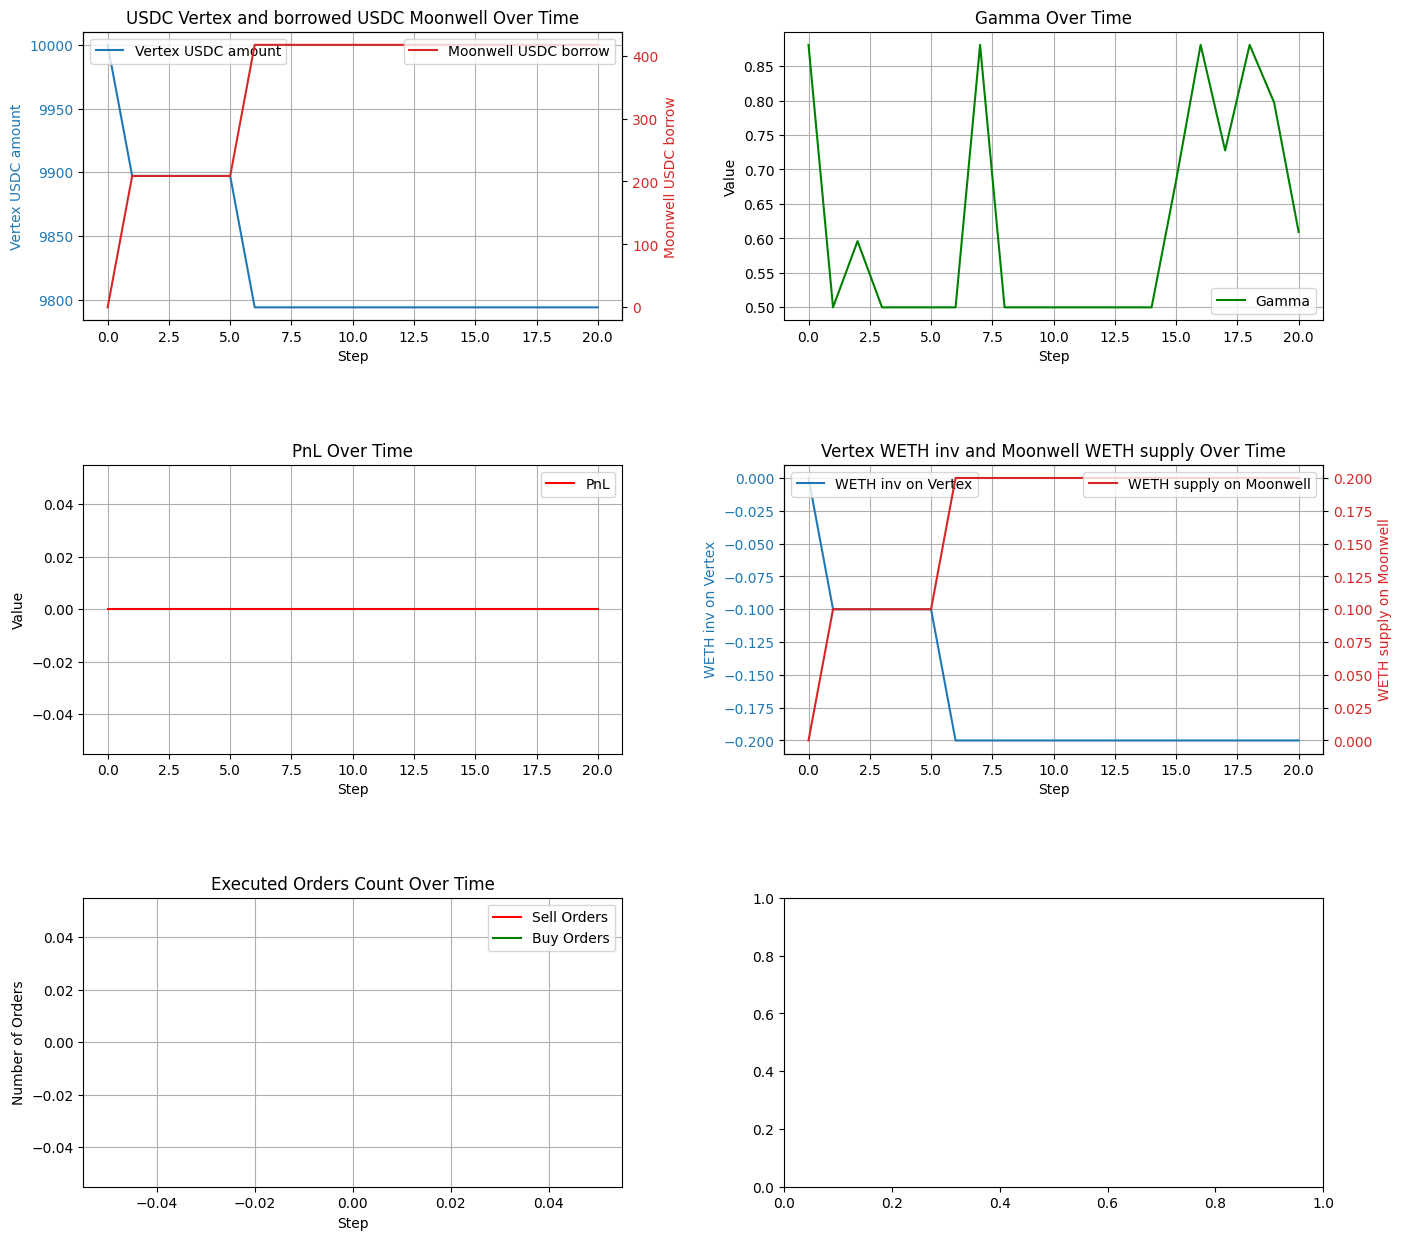

In [135]:
env.make_plots()

In [40]:
env = MarketMakingEnv(X_train, window_size=100)
vec_env, obs = env.get_sb_env()

from stable_baselines3 import PPO
model = PPO("MlpPolicy", vec_env, verbose=0)
model.learn(total_timesteps=2048)
# print(self.current_step, self.balance_quote, self.balance_base, self.pnl)
# print(amount_cur_level, as_ask_quote_price, amount_cur_level * as_ask_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
# print(full_inv, base_token_part, quote_token_part, self.base_token, self.quote_token, 888)
# print(inventory_penalty, pnl_reward, 999)

C:\Users\evskl\PyCharmMiscProject\.venv\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


0 5000.0 92.97136481963555 0
1 5000.0 92.97136481963555 0.0
2 5000.0 92.97136481963555 0.0
3 5000.0 92.97136481963555 0.0
4 5000.0 92.97136481963555 0.0
5 6000.0 74.38400422484001 3.719027402014035
6 6000.0 74.38400422484001 4.4628674442610645
7 6000.0 74.38400422484001 4.4628674442610645
8 6000.0 74.38400422484001 5.206707486509913
9 6000.0 74.38400422484001 6.69438757100761
10 6000.0 74.38400422484001 6.69438757100761
11 6000.0 74.38400422484001 6.69438757100761
12 6000.0 74.38400422484001 6.69438757100761
13 6000.0 74.38400422484001 6.69438757100761
14 6000.0 74.38400422484001 6.69438757100761
15 6000.0 74.38400422484001 6.69438757100761
16 6000.0 74.38400422484001 6.69438757100761
17 6000.0 74.38400422484001 6.69438757100761
18 6000.0 74.38400422484001 6.322467549882276
19 6000.0 74.38400422484001 6.322467549882276
20 6000.0 74.38400422484001 6.322467549882276
21 6000.0 74.38400422484001 6.322467549882276
22 6000.0 74.38400422484001 6.322467549882276
23 6000.0 74.38400422484001 6.3

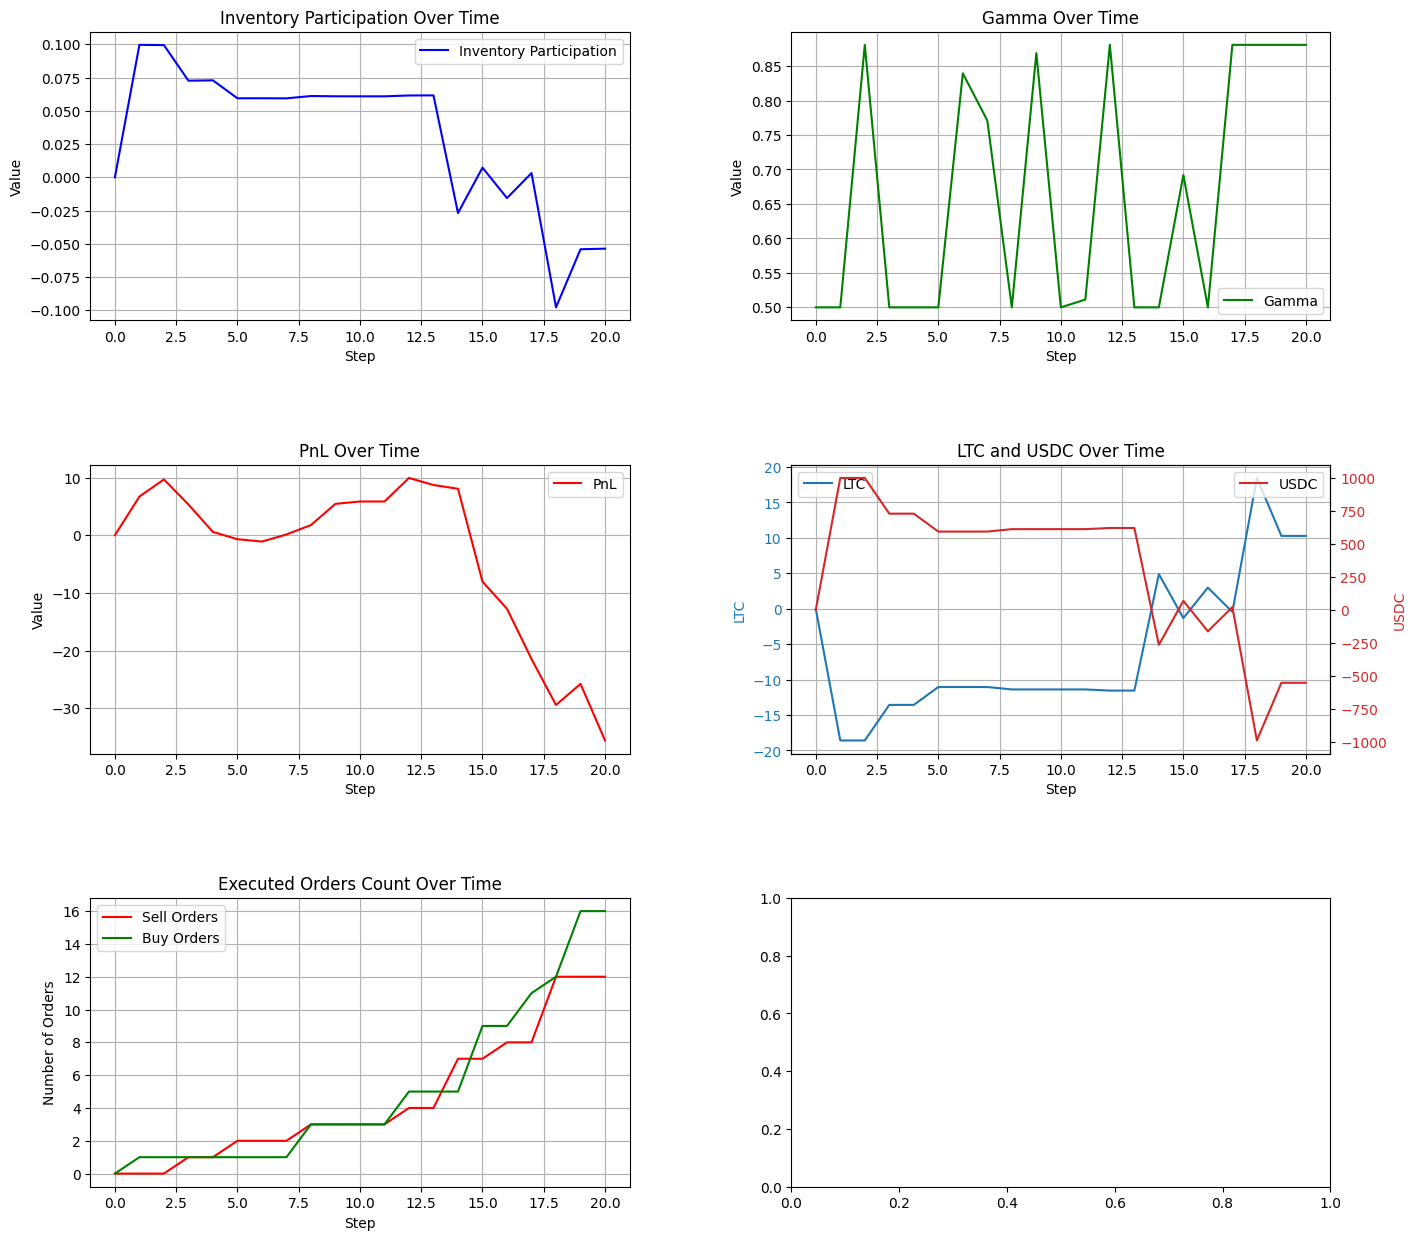

In [41]:
env = MarketMakingEnv(X_train, window_size=100)
vec_env, obs = env.get_sb_env()
obs = vec_env.reset()

gammas = []
PnLs = []
for i in range(10000):
    clear_output(True)
    if i % 1000 == 0:
        env.make_plots()
    action, _ = model.predict(obs)
    obs, reward, done, info = vec_env.step(action)
    print(f"Step: {env.current_step}, Gamma: {info[0]['gamma']:.3f}, PnL: {info[0]['pnl']:.2f}")
    gammas.append(info[0]['gamma'])
    PnLs.append(info[0]['pnl'])
    if done:
        break

KeyboardInterrupt: 

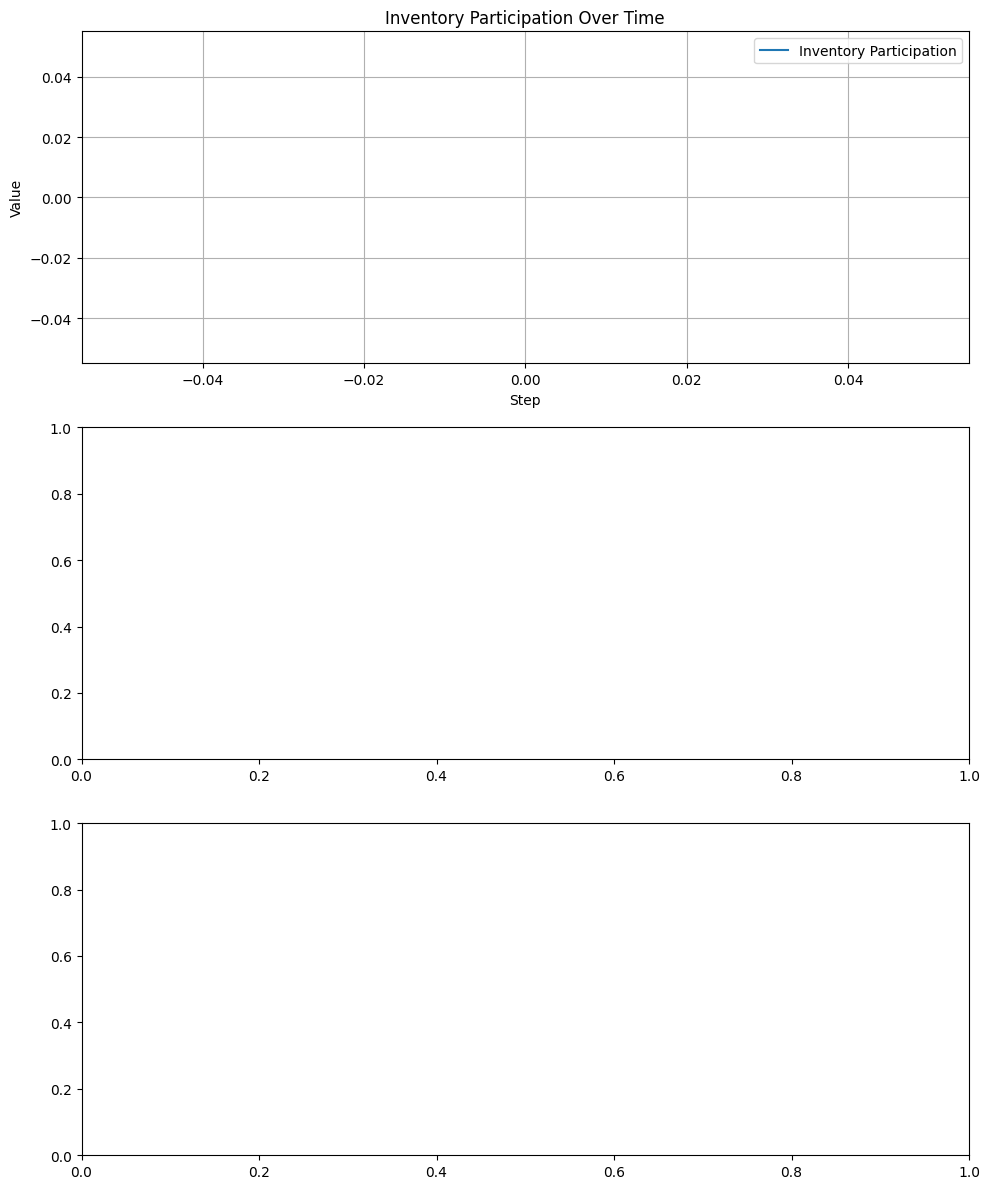

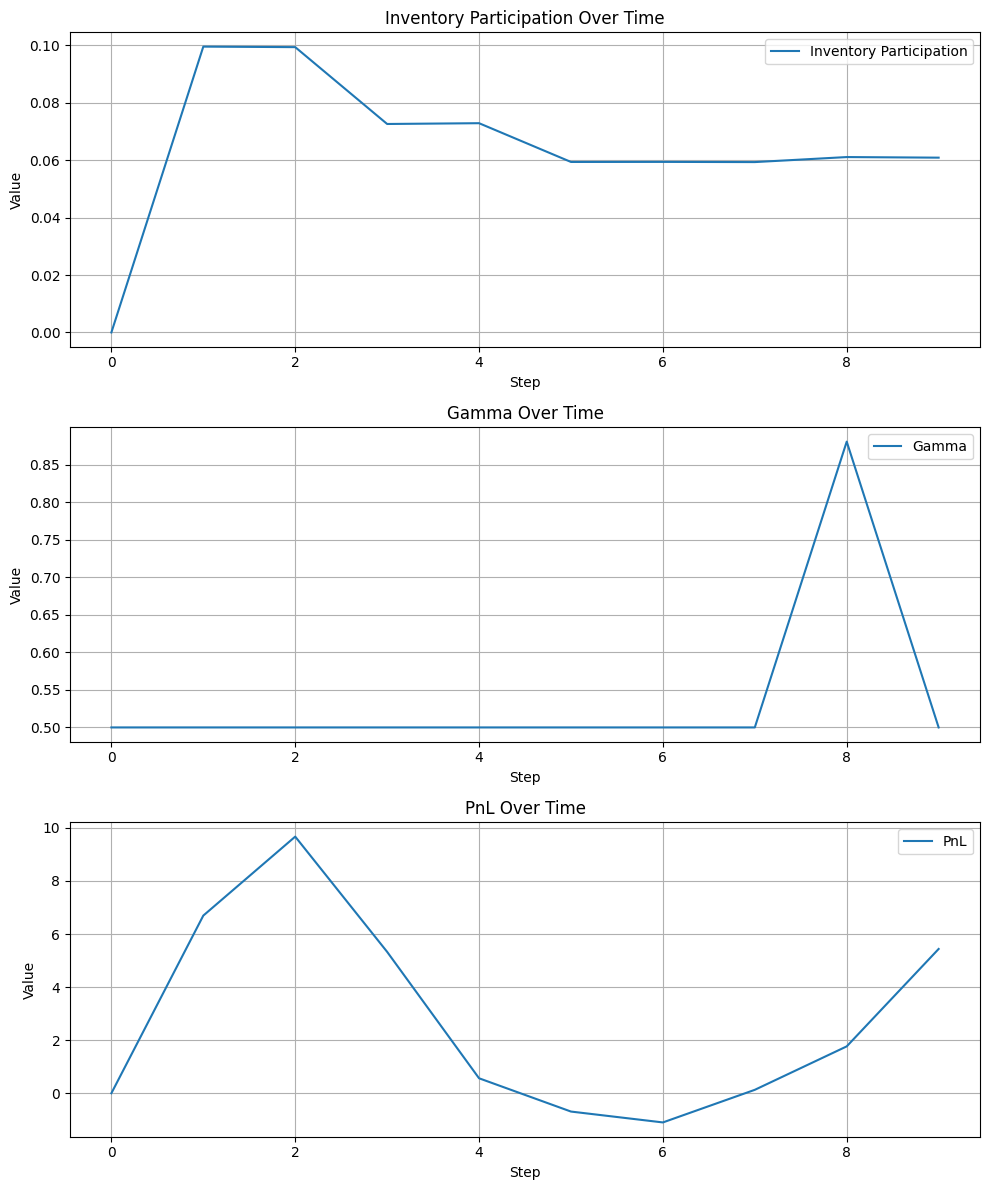

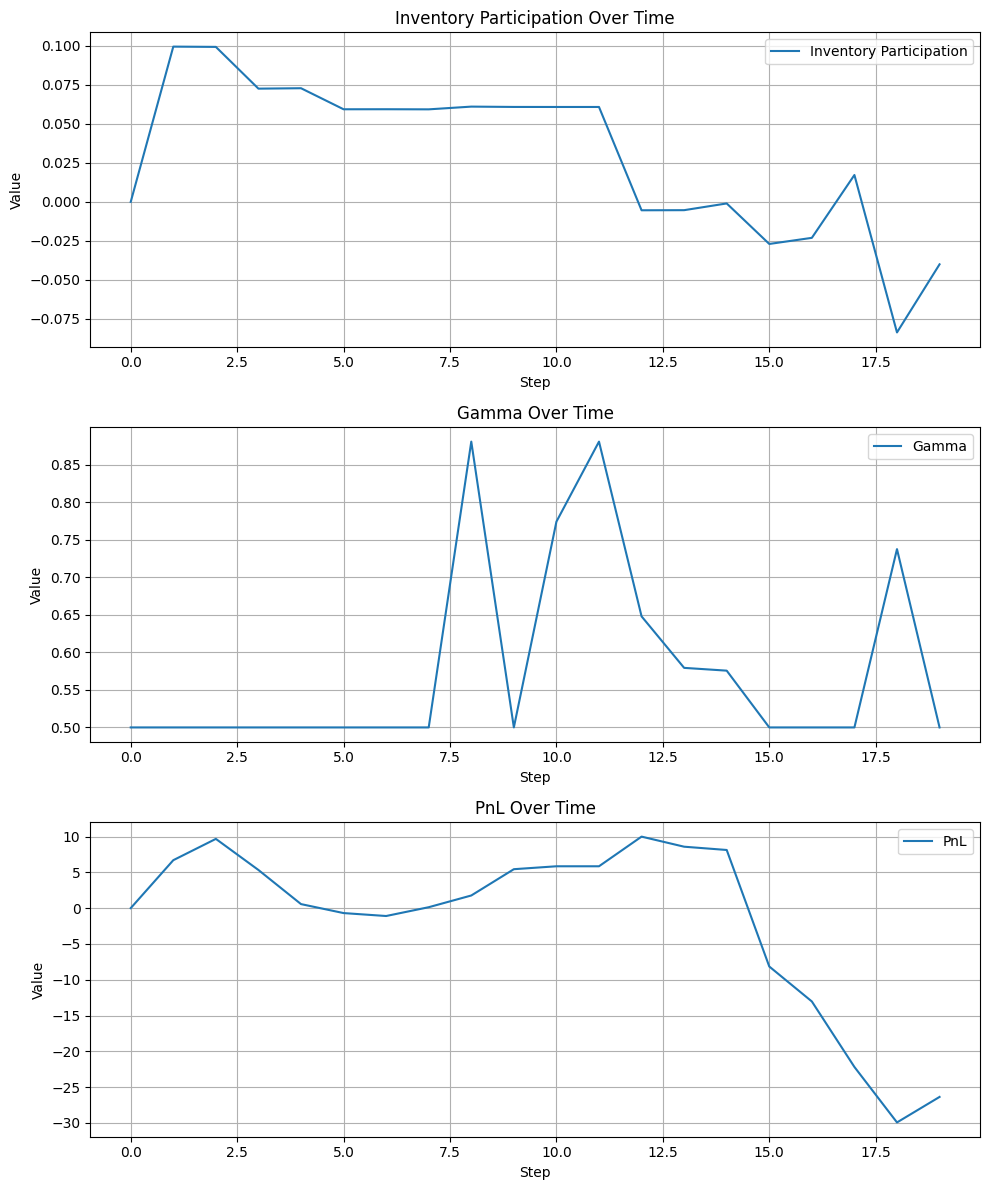

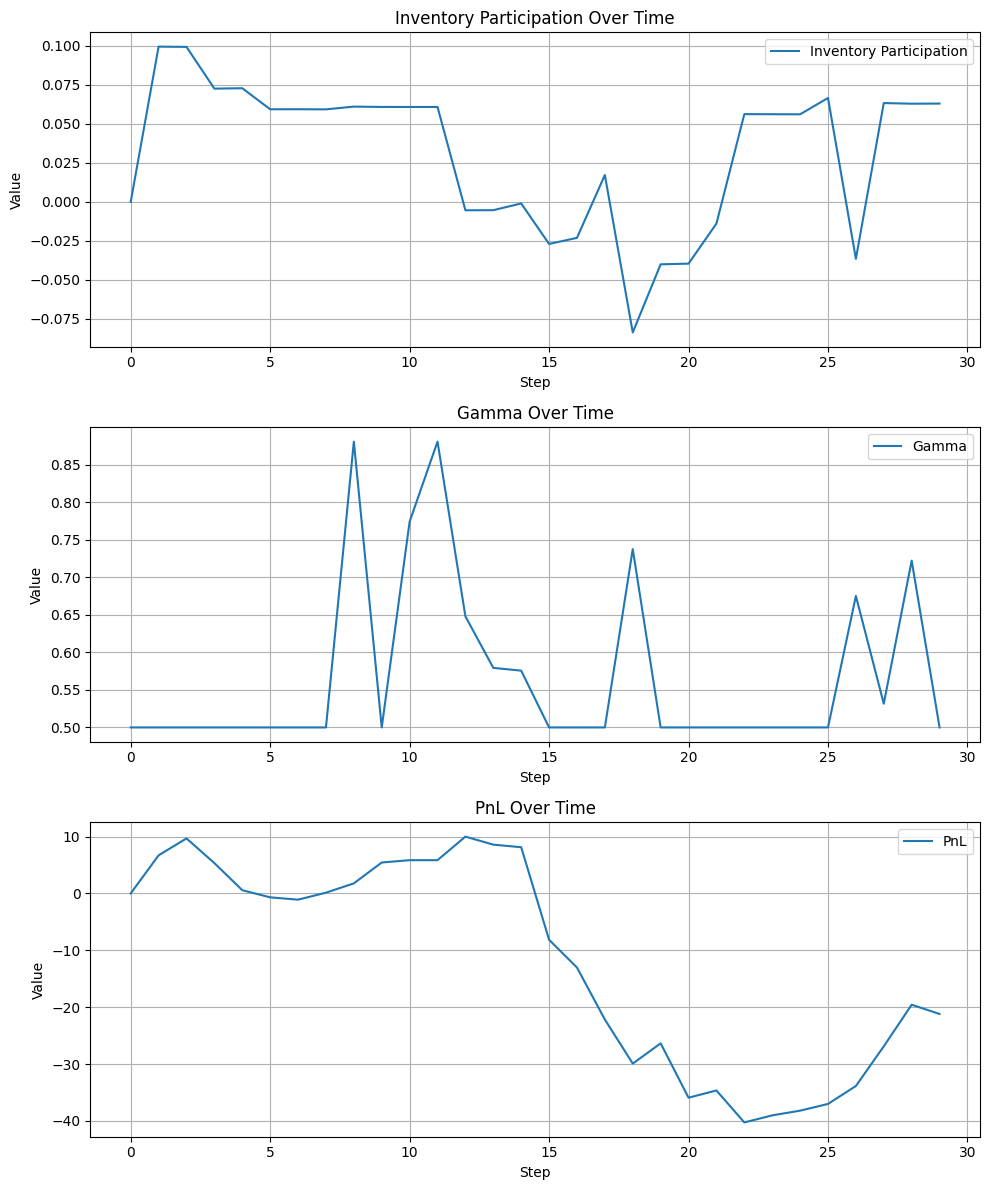

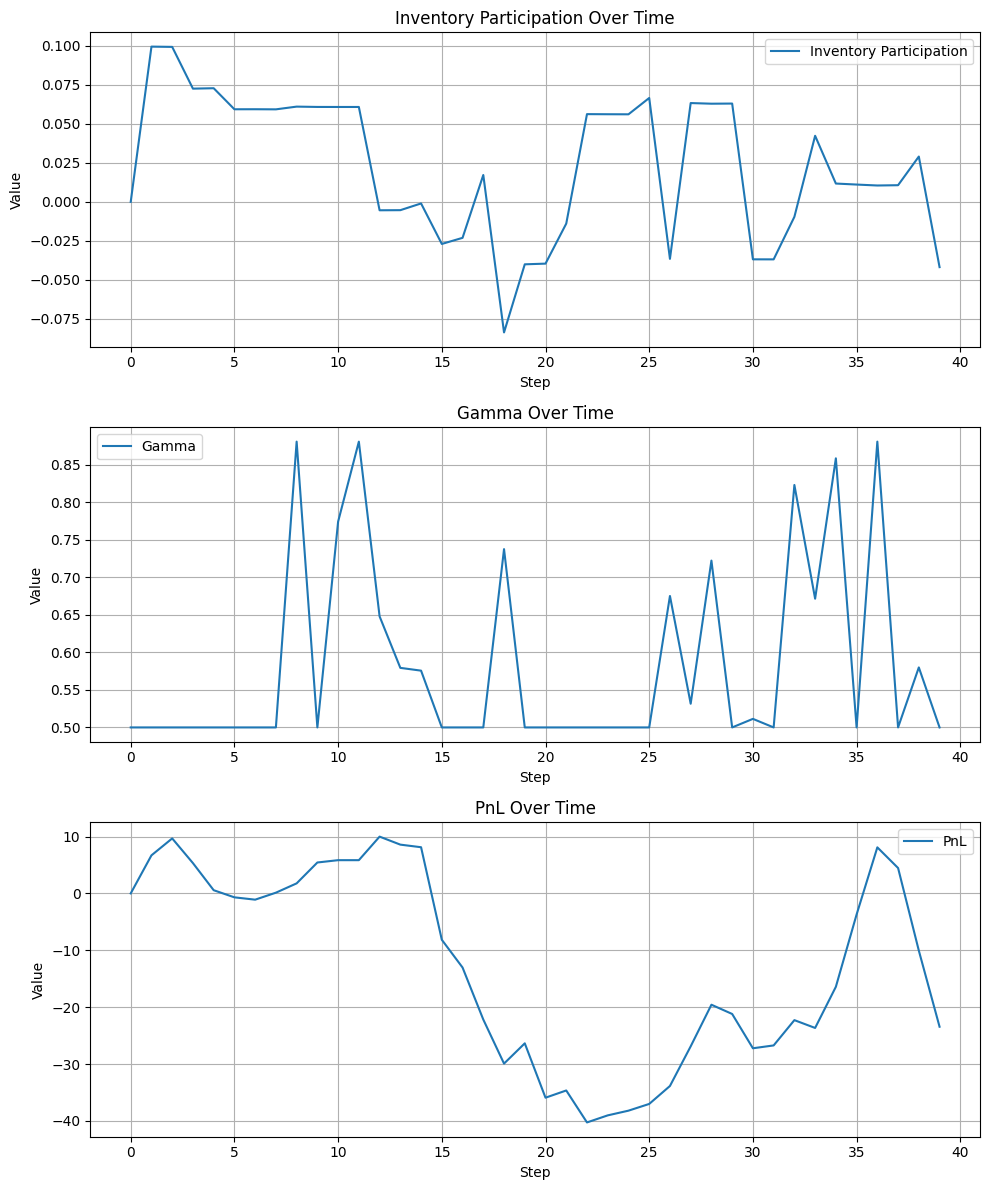

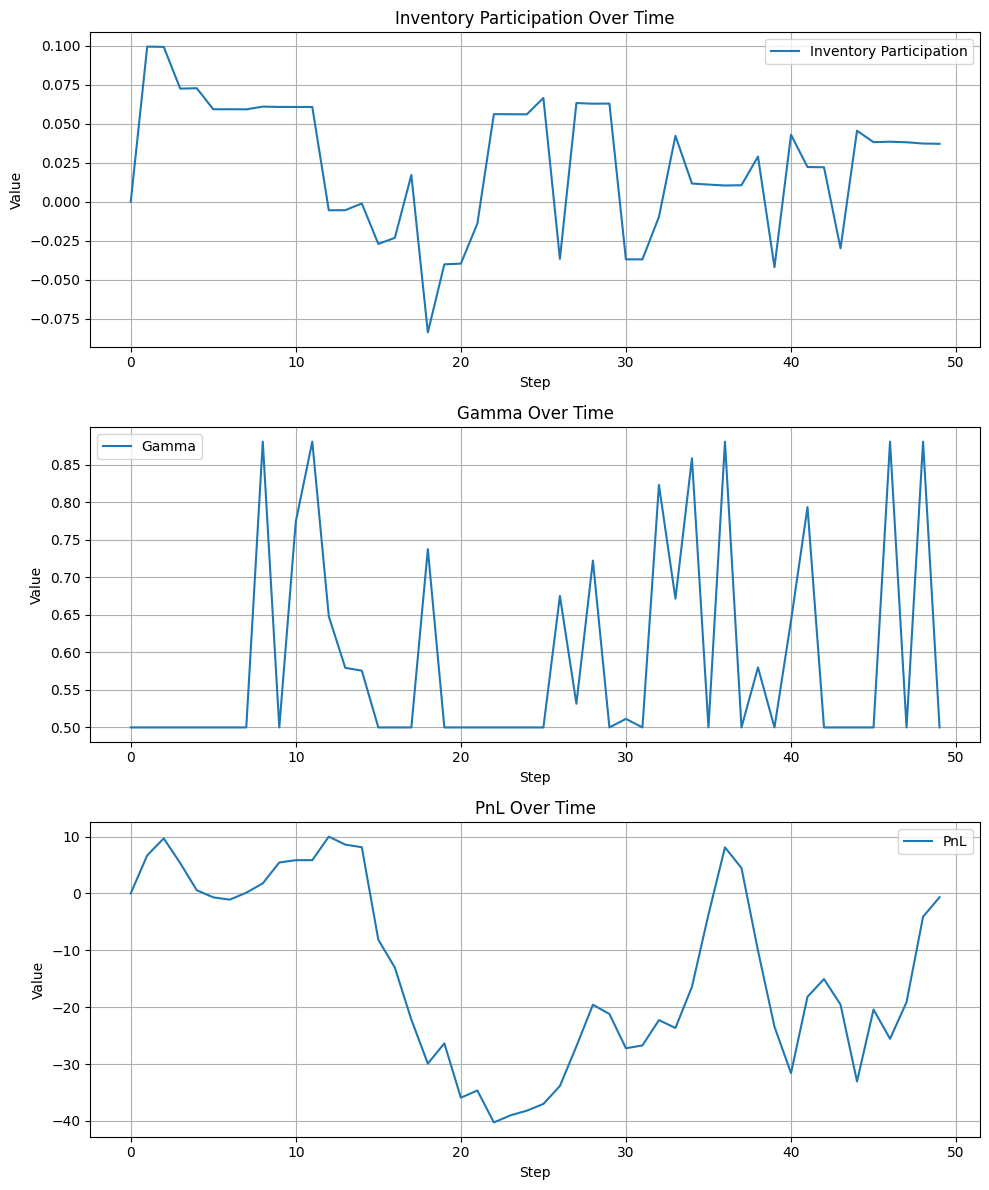

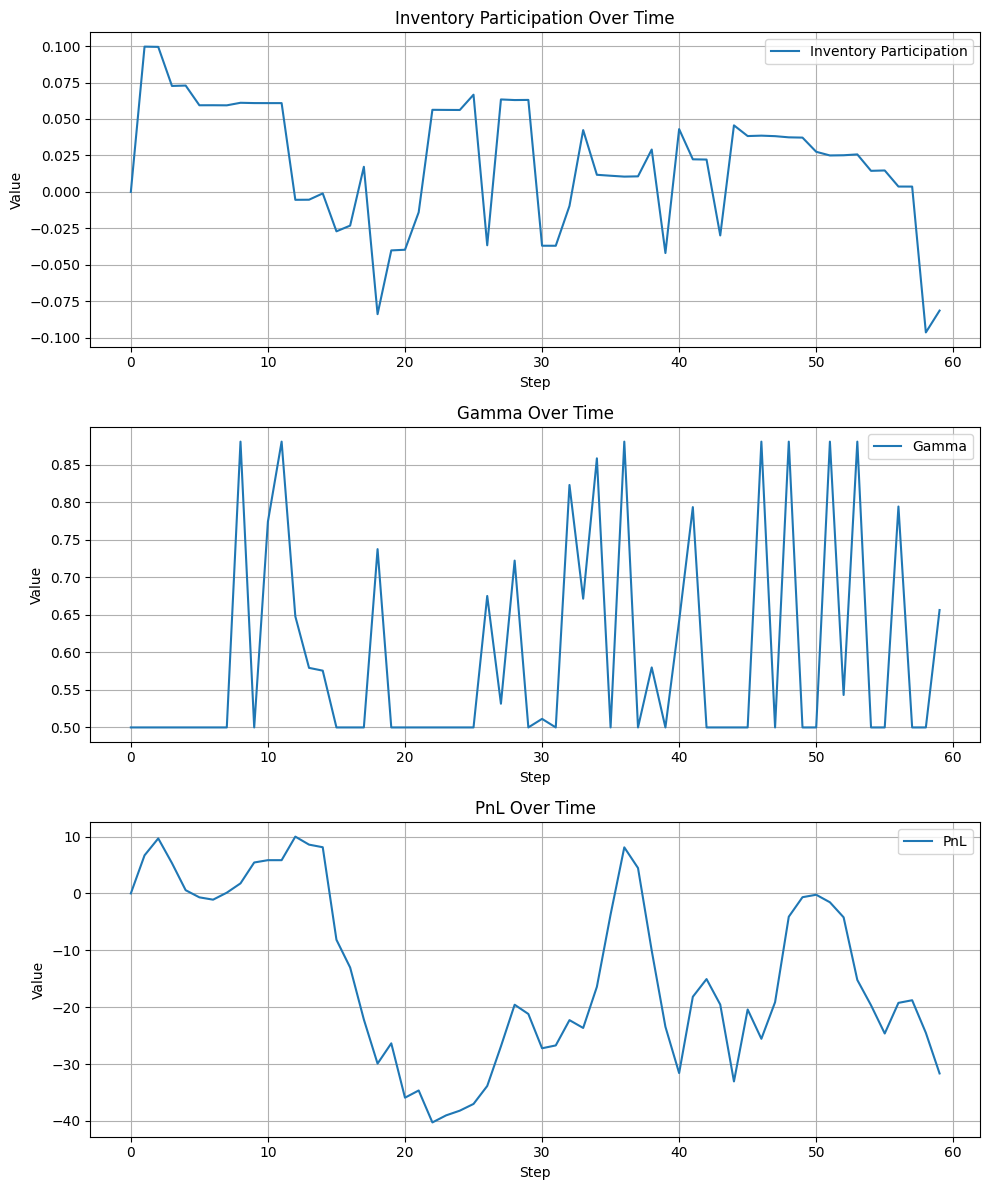

In [10]:
    env = MarketMakingEnv(X_train, window_size=100)
vec_env, obs = env.get_sb_env()
obs = vec_env.reset()

gammas = []
PnLs = []
for i in range(10000):
    clear_output(True)
    if i % 1000 == 0:
        env.make_plots()
    action, _ = model.predict(obs)
    obs, reward, done, info = vec_env.step(action)
    print(f"Step: {env.current_step}, Gamma: {info[0]['gamma']:.3f}, PnL: {info[0]['pnl']:.2f}")
    gammas.append(info[0]['gamma'])
    PnLs.append(info[0]['pnl'])
    if done:
        break

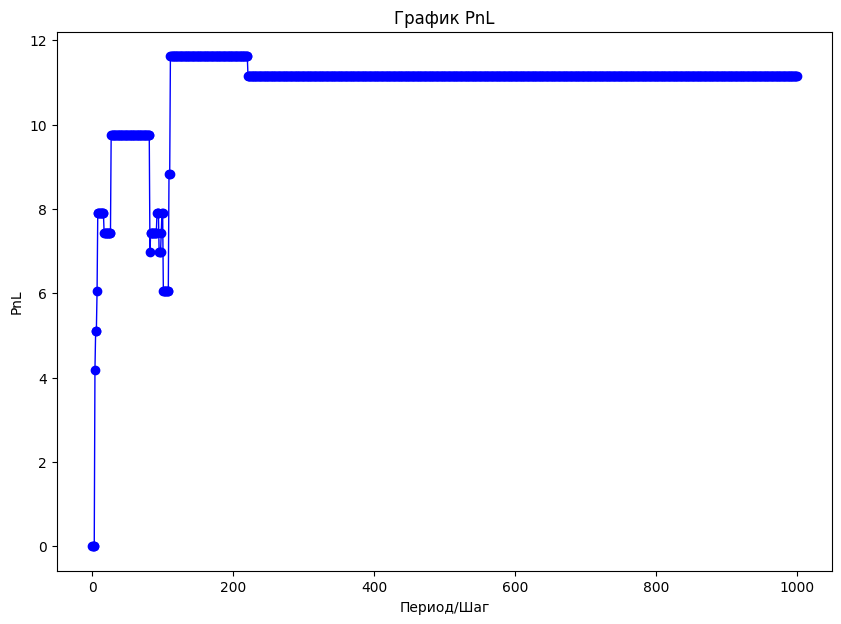

In [99]:
plt.figure(figsize=(10, 7))
plt.plot(PnLs, marker='o', color='b', linewidth=1)
plt.title('График PnL')
plt.xlabel('Период/Шаг')
plt.ylabel('PnL')
plt.show()

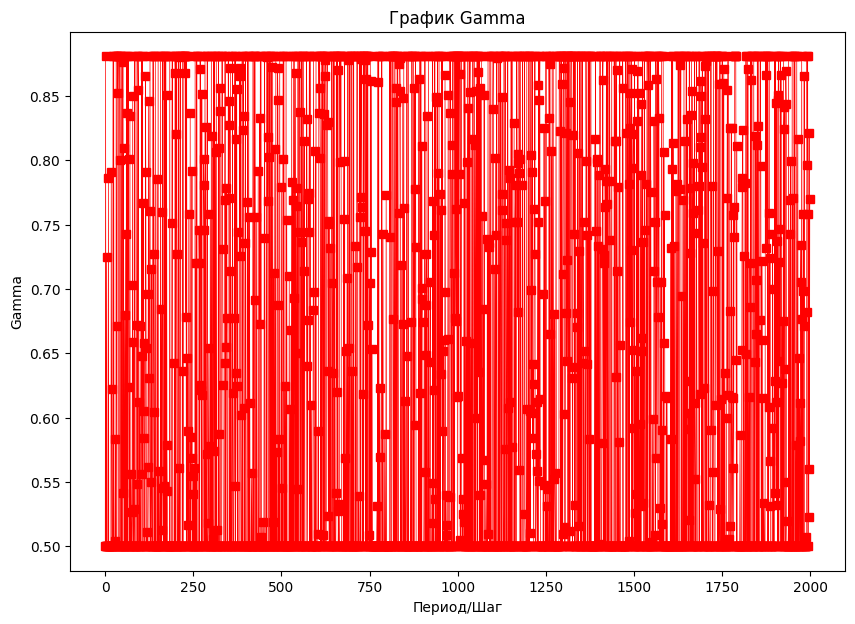

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(gammas, marker='s', color='r', linewidth=0.5)
plt.title('График Gamma')
plt.xlabel('Период/Шаг')
plt.ylabel('Gamma')
plt.show()